## Uso de Séries Temporais para Análise de Beneficiários Ativos da Saúde Suplementar

### Objetivo

Em um mercado altamente competitivo como o da saúde suplementar, a capacidade de se preparar adequadamente para as mudanças e tendências do mercado pode se tornar um diferencial crucial para as operadoras de planos de saúde. Nesse contexto, a aplicação efetiva da inteligência artificial (IA) emerge como um fator determinante para o setor de saúde, ganhando cada vez mais destaque e gerando impactos positivos em diversos departamentos e processos.<br>
Com o objetivo de explorar e aproveitar o potencial da IA, este estudo visa analisar a série temporal dos dados relacionados à evolução mensal do SIB (Sistema de Informações de Beneficiários), um sistema informatizado que contém informações cadastrais dos beneficiários de planos privados de saúde no Brasil. O escopo dessa análise abrange tanto uma perspectiva preditiva quanto uma abordagem descritiva, permitindo a identificação de tendências, sazonalidades e outras características relevantes.<br>
Ao realizar uma análise preditiva, pretendemos utilizar técnicas avançadas de IA para fazer previsões com base nas séries temporais disponíveis no SIB. Essas previsões podem auxiliar as operadoras de planos de saúde na tomada de decisões estratégicas, como alocação de recursos, planejamento de demanda e elaboração de estratégias de marketing mais eficientes.<br>
Além disso, por meio de uma análise descritiva, pretendemos explorar as características intrínsecas das séries temporais, identificando tendências de longo prazo, padrões sazonais, flutuações periódicas e outros aspectos relevantes. Essa análise nos permitirá compreender melhor os dados e fornecer insights valiosos para a gestão da saúde suplementar, ajudando a identificar possíveis áreas de melhoria, antecipar demandas e otimizar processos operacionais.<br>
Para alcançar tais objetivos, este estudo utilizará três algoritmos distintos de aprendizado de máquina: SARIMAX, XGBoost e Redes Neurais Tradicionais (MLP).<br>
O algoritmo **SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) é uma extensão do modelo ARIMA (AutoRegressive Integrated Moving Average) que incorpora componentes sazonais. Ele é amplamente utilizado na análise de séries temporais, permitindo capturar padrões sazonais e tendências ao considerar tanto a ordem das diferenças (determinada pela integração) quanto a autocorrelação e médias móveis.<br>
O **XGBoost** (Extreme Gradient Boosting) é um algoritmo de aprendizado de máquina baseado em árvores de decisão, conhecido por sua eficiência e precisão. Ele utiliza o método de boosting para criar um modelo preditivo poderoso, que combina várias árvores de decisão fracas para formar um modelo mais robusto e geralmente mais preciso. O XGBoost é amplamente aplicado em problemas de regressão e classificação, e sua capacidade de lidar com grandes conjuntos de dados e variáveis complexas o torna uma escolha popular para análise de séries temporais.<br>
As **Redes Neurais Tradicionais**, também conhecidas como **Multilayer Perceptrons (MLP)**, são um tipo de modelo de aprendizado de máquina inspirado no funcionamento do cérebro humano. Elas consistem em várias camadas de neurônios artificiais, cada um dos quais recebe entradas, processa-as e transmite os resultados para a próxima camada. As MLPs são capazes de aprender relações complexas entre as variáveis de entrada e saída, tornando-as adequadas para a análise de séries temporais, onde podem identificar padrões e tendências não lineares.<br>
Ao usar esses três algoritmos distintos, SARIMAX, XGBoost e Redes Neurais Tradicionais (MLP), este estudo se beneficiará de abordagens variadas e complementares. O SARIMAX explorará a estrutura temporal e sazonal dos dados, o XGBoost aproveitará as vantagens do boosting e das árvores de decisão, enquanto as Redes Neurais Tradicionais (MLP) utilizarão sua capacidade de aprender representações complexas. Essa combinação de algoritmos permitirá uma análise abrangente e robusta das séries temporais relacionadas ao SIB, fornecendo insights valiosos para a gestão da saúde suplementar.<br>


### Base de Dados

Explicar a base de dados

## Código

### Importando as bibliotecas que serão utilizadas nesse estudo

In [1]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd
import datetime
# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Imports para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Imports para modelagem preditiva
import statsmodels
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoMLP


# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.stattools import jarque_bera

# Imports para trazer as funções de conexão com o DB
import import_ipynb
from ConexaoDB import *

import warnings
warnings.filterwarnings('ignore')

importing Jupyter notebook from ConexaoDB.ipynb


In [2]:
def testa_estacionaridade(serie):
    '''
    Função uque irá testar a estacionariadade dos dados.
    '''
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    
    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

## Modelo SARIMAX

O modelo usado para previsão depende dos dados da série temporal. A série temporal precisa ser dividida para ver se contém ou não partes autorregressivas (AR) e partes de média móvel (MA), integração e sazonalidade.

Os gráficos de função de autocorrelação (ACF) e os gráficos de função de autocorrelação parcial (PACF) podem ser usados para determinar se a série temporal contém partes AR e MA.

Parâmetros que devem ser deifnidos para o modelo SARIMAX:

* p - número de atrasos ou lags (AR)
* d - número de diferenciações necessárias
* q - número de atrasos de erro (MA)
* P - número de atrasos sazonais (AR)
* D - número de diferenças sazonais necessárias
* Q - número de defasagens de erro sazonal (MA)
* S - sazonalidade

### Carregando e Visualizando os dados

#### Script para importação no DB
Os dados que será estudado foi previamente carregado no Banco de Dados.<br>
Nessa primeira parte iremos trazer as seguintes informações:<br><br>
- **AnoMes** - campo que corresponde a competência que os dados representa. <br>
- **BeneficiariosAtivos** - campo com a somatória de beneficiários ativos por competência. <br><br>
Importante resaltar que os dados estarão filtrados pelo campo Cobertura Assistencial Plano, que irá trazer apenas os classificados como "Médico-hospitalar"<br>



In [3]:
#Query usada para acessar os dados no banco de dados
select = ''' SELECT AnoMes, SUM(Qtd_Benef_Ativos) AS BeneficiariosAtivos FROM beneficiariosconsolidadouf
WHERE Cobertura_Assitencial_Plan = "Médico-hospitalar"
GROUP BY AnoMes
'''

In [4]:
df1 = select_base(select)

In [5]:
df1.head()

AnoMes  BeneficiariosAtivos
0  201405           49621252.0
1  201406           49701970.0
2  201407           49794137.0
3  201408           49923073.0
4  201409           50012512.0

In [6]:
# Transformando o campo AnoMes em data e passando para o index
df1['AnoMes'] = df1['AnoMes'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m'))
df1.rename(columns={'AnoMes': 'data'}, inplace=True)
df1.set_index('data', inplace=True)

In [7]:
df1.tail()

BeneficiariosAtivos
data                           
2022-11-01           50195515.0
2022-12-01           50352475.0
2023-01-01           49929363.0
2023-02-01           49945411.0
2023-03-01           50163115.0

In [8]:
df1.shape

(107, 1)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2014-05-01 to 2023-03-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BeneficiariosAtivos  107 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [10]:
# Verificando a menor e a maior data da base
df1.index.min(), df1.index.max()

(Timestamp('2014-05-01 00:00:00'), Timestamp('2023-03-01 00:00:00'))

In [11]:
# Verificando algunas estatísticas descritivas
round(df1.describe(),2)

BeneficiariosAtivos
count               107.00
mean           48148486.64
std             1255473.34
min            46583382.00
25%            46988933.50
50%            47732268.00
75%            49471126.50
max            50352475.00

### Plotando gráficos para análise exploratória

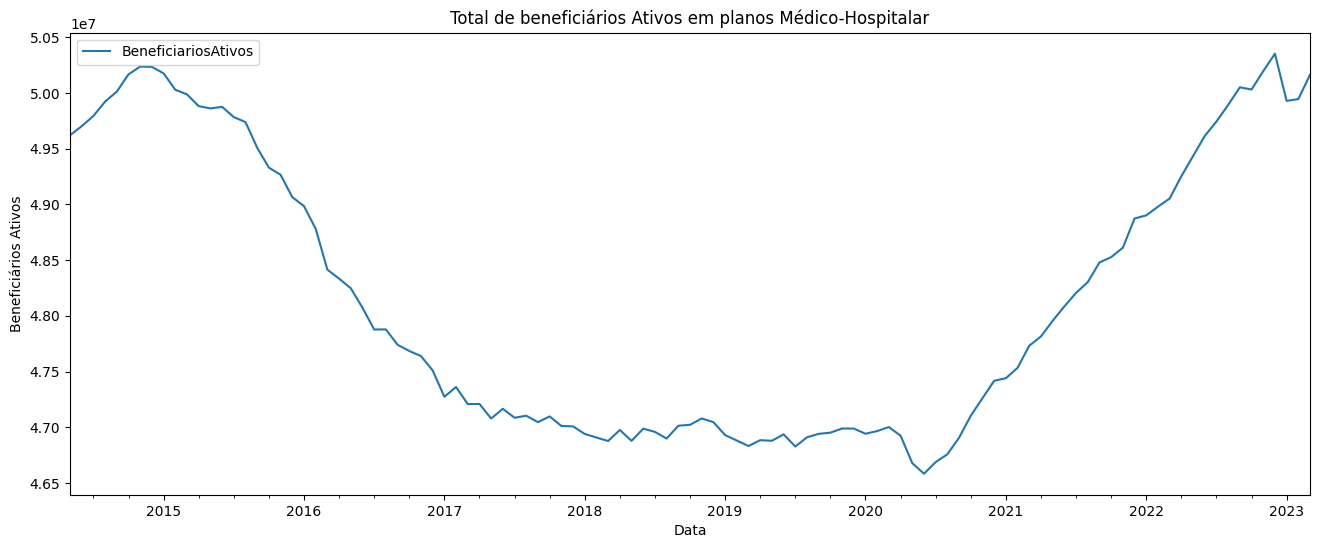

In [12]:
#Plontando a Série Temporal
df1.plot(figsize=(16,6))
plt.title("Total de beneficiários Ativos em planos Médico-Hospitalar")
plt.xlabel("Data")
plt.ylabel("Beneficiários Ativos")
plt.show()

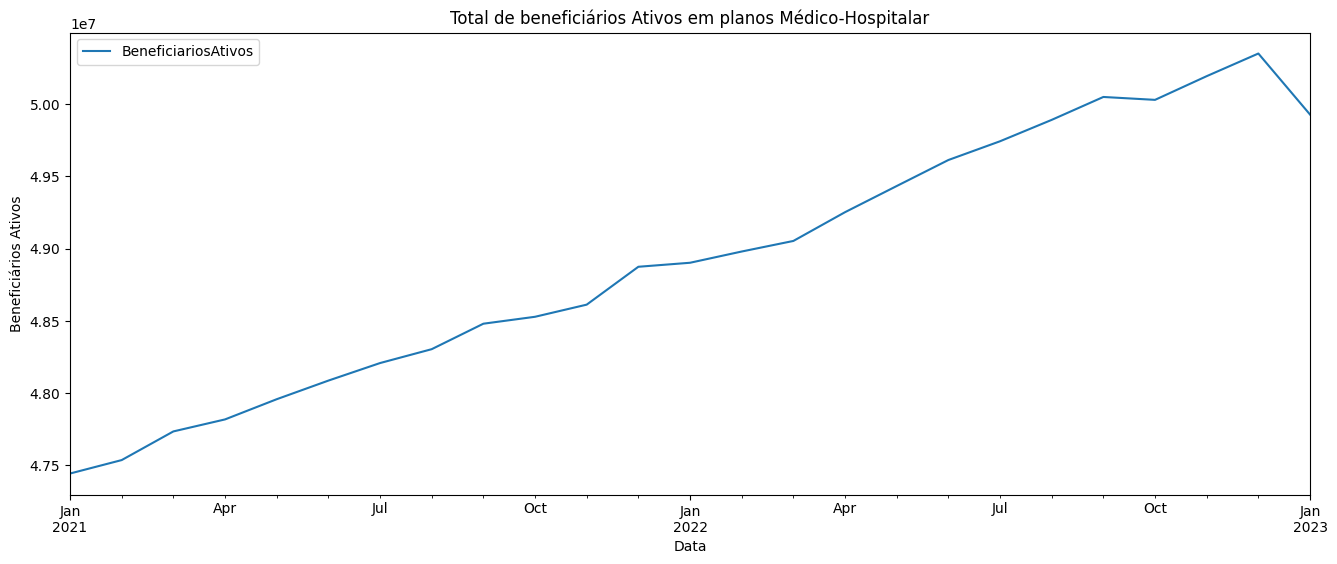

In [13]:
# Plotando um período menor para verificar se temos sazonalidade
filtro = df1.loc['2021-01-01': '2023-01-01']
filtro.plot(figsize=(16,6))
plt.title("Total de beneficiários Ativos em planos Médico-Hospitalar")
plt.xlabel("Data")
plt.ylabel("Beneficiários Ativos")
plt.show()

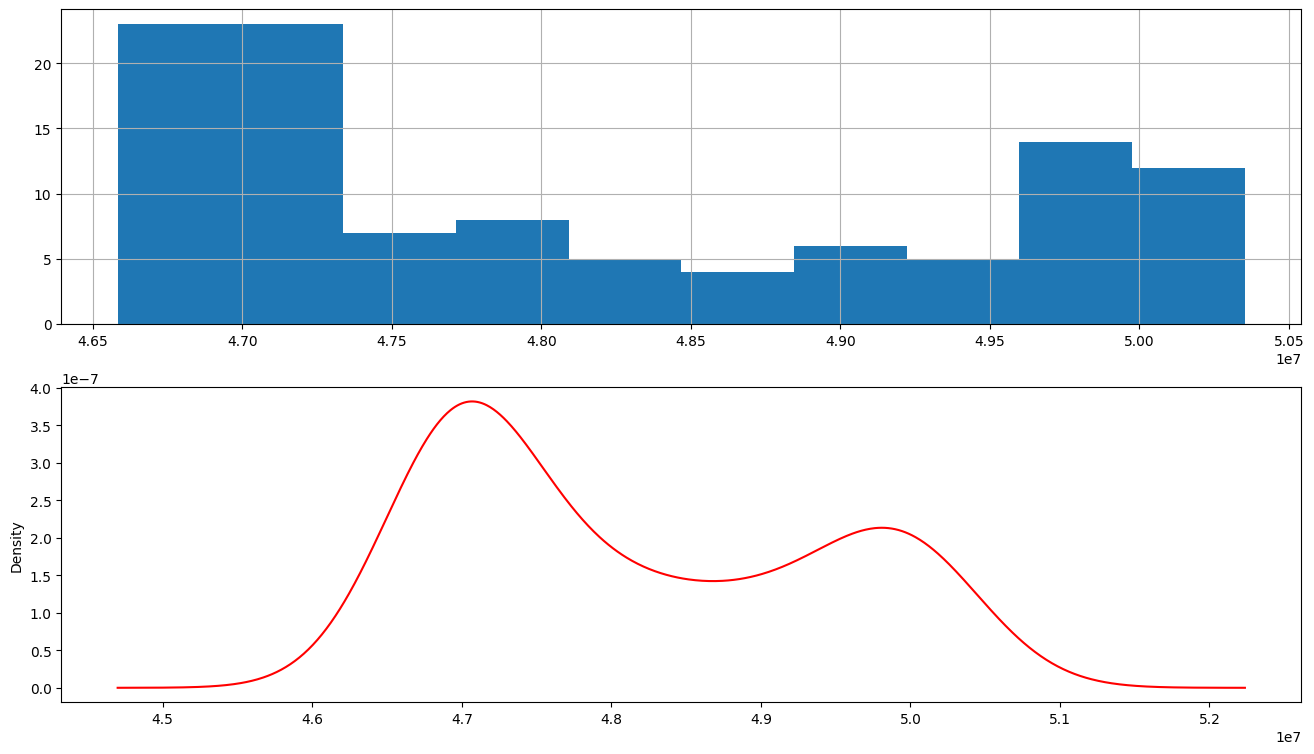

In [14]:
# Gráfico de Densidade
plt.figure(figsize=(16,9))
plt.subplot(211)
df1['BeneficiariosAtivos'].hist()
plt.subplot(212)
df1['BeneficiariosAtivos'].plot(kind = 'kde', color='red')
plt.show()

Text(0, 0.5, 'BeneficiariosAtivos')

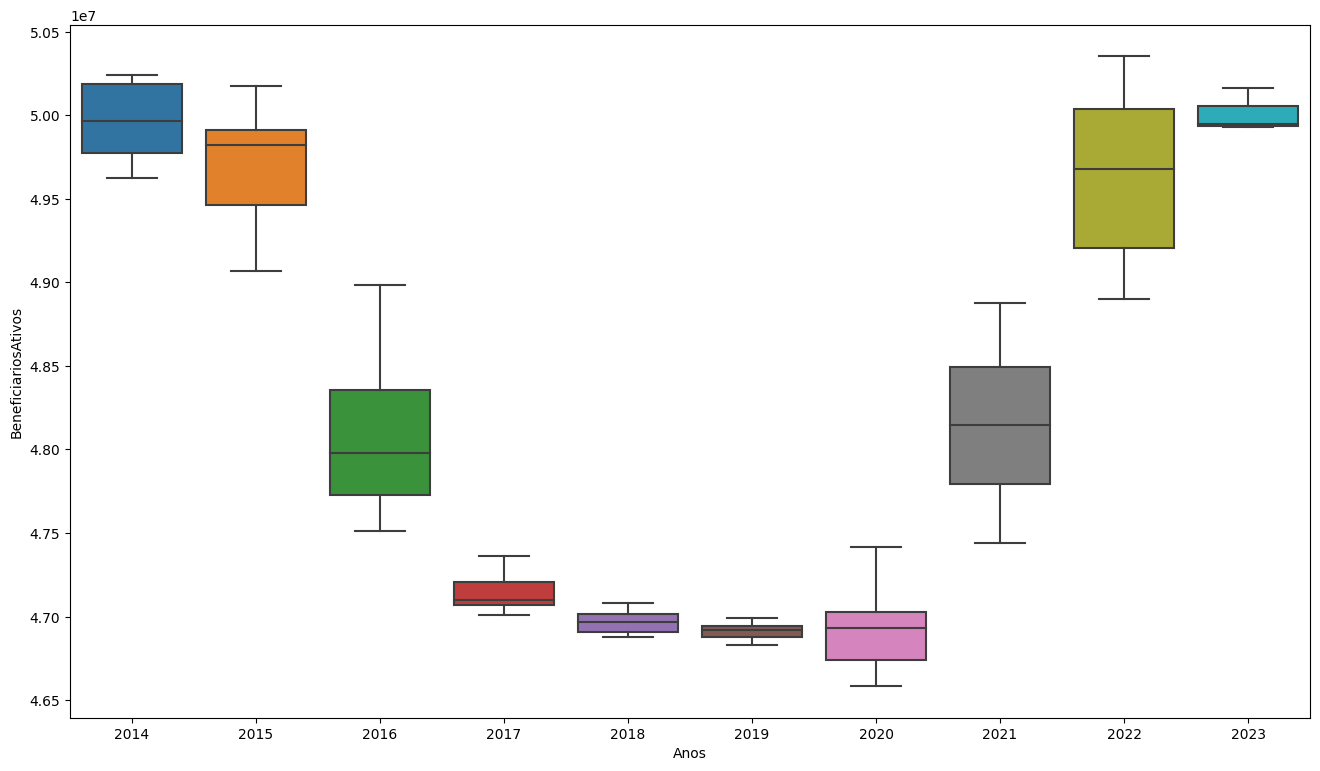

In [15]:
# Boxplot por ano
fig, ax = plt.subplots(figsize=(16,9))
indice_ano = df1.index.year
valor = df1['BeneficiariosAtivos']
sns.boxplot(x = indice_ano, y = valor, ax = ax, data = df1)
plt.xlabel("Anos")
plt.ylabel("BeneficiariosAtivos")

### Decomposição da Série Temporal

In [18]:
# Decomposição da série temporal
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(df1, 
                                                 model = 'multiplicative', 
                                                 extrapolate_trend = 'freq')

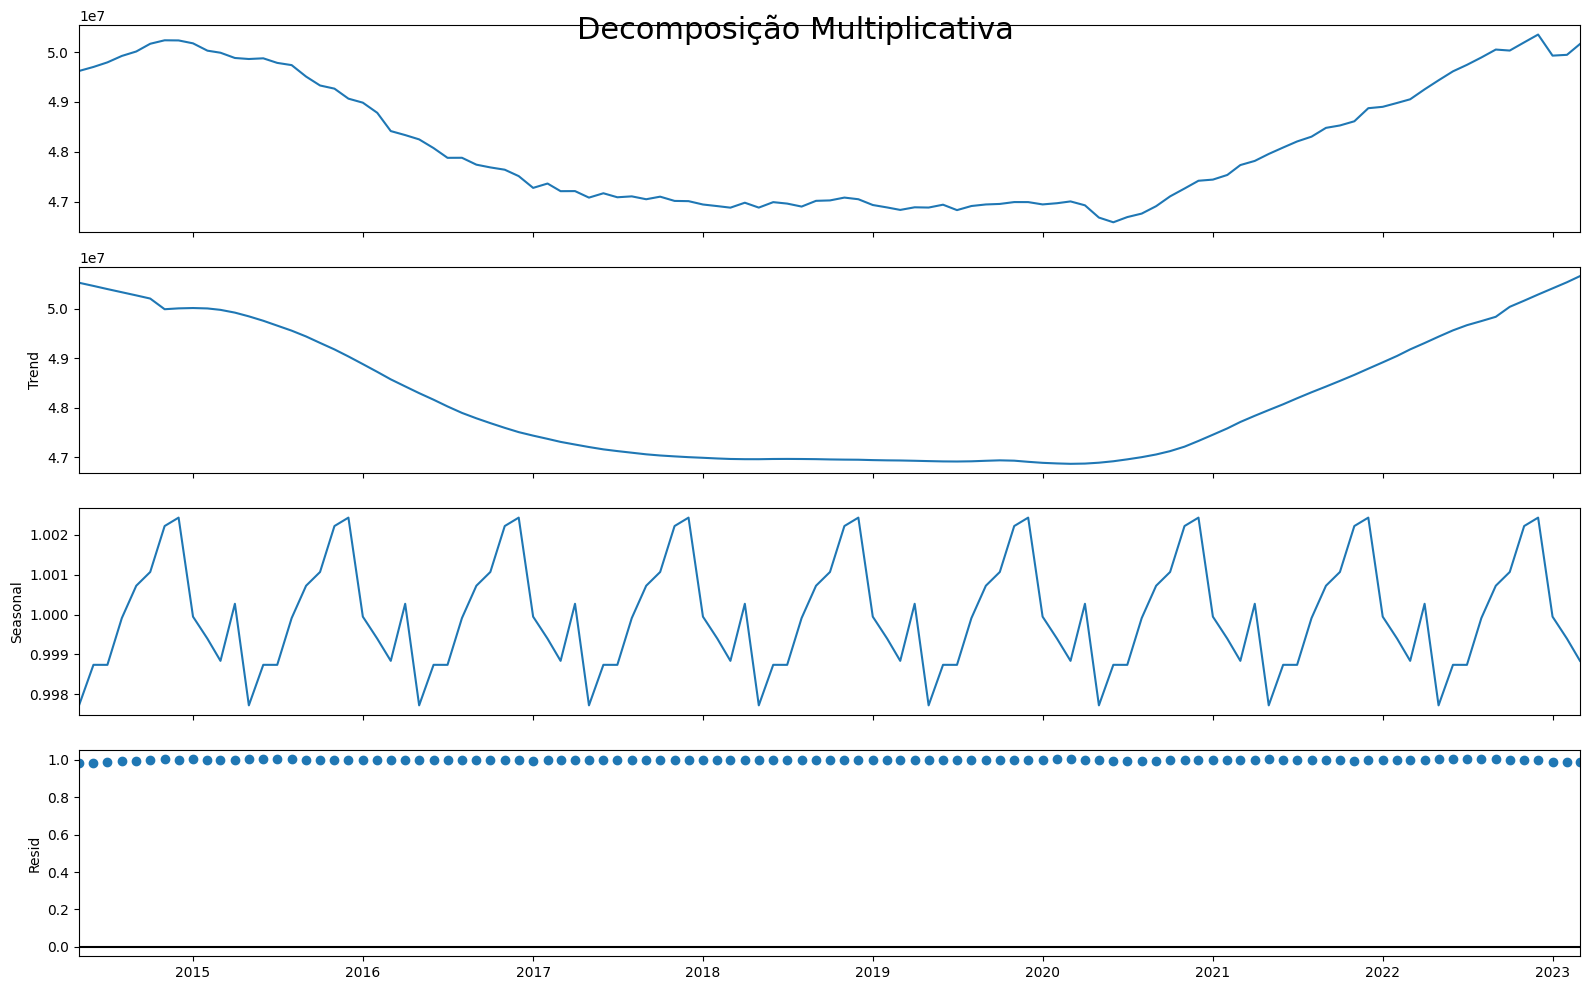

In [19]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
plt.show()

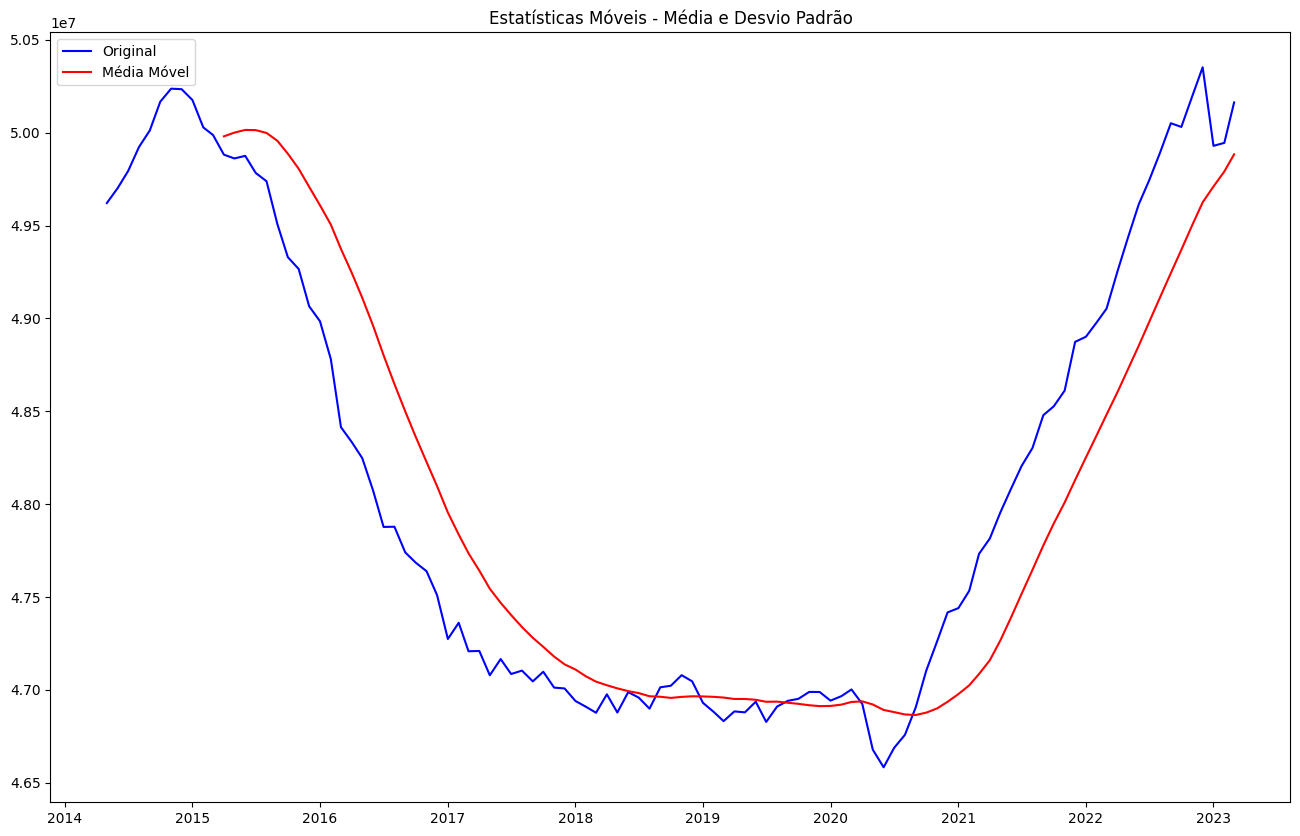

In [20]:
# Calcula estatísticas móveis
rolmean = df1.rolling(window = 12).mean()
#rolstd = df1.rolling(window = 12).std()

# Plot das estatísticas móveis
orig = plt.plot(df1, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
#std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')

# Plot
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão')
plt.show()

### Plots de Autocorrelação (ACF e PACF)

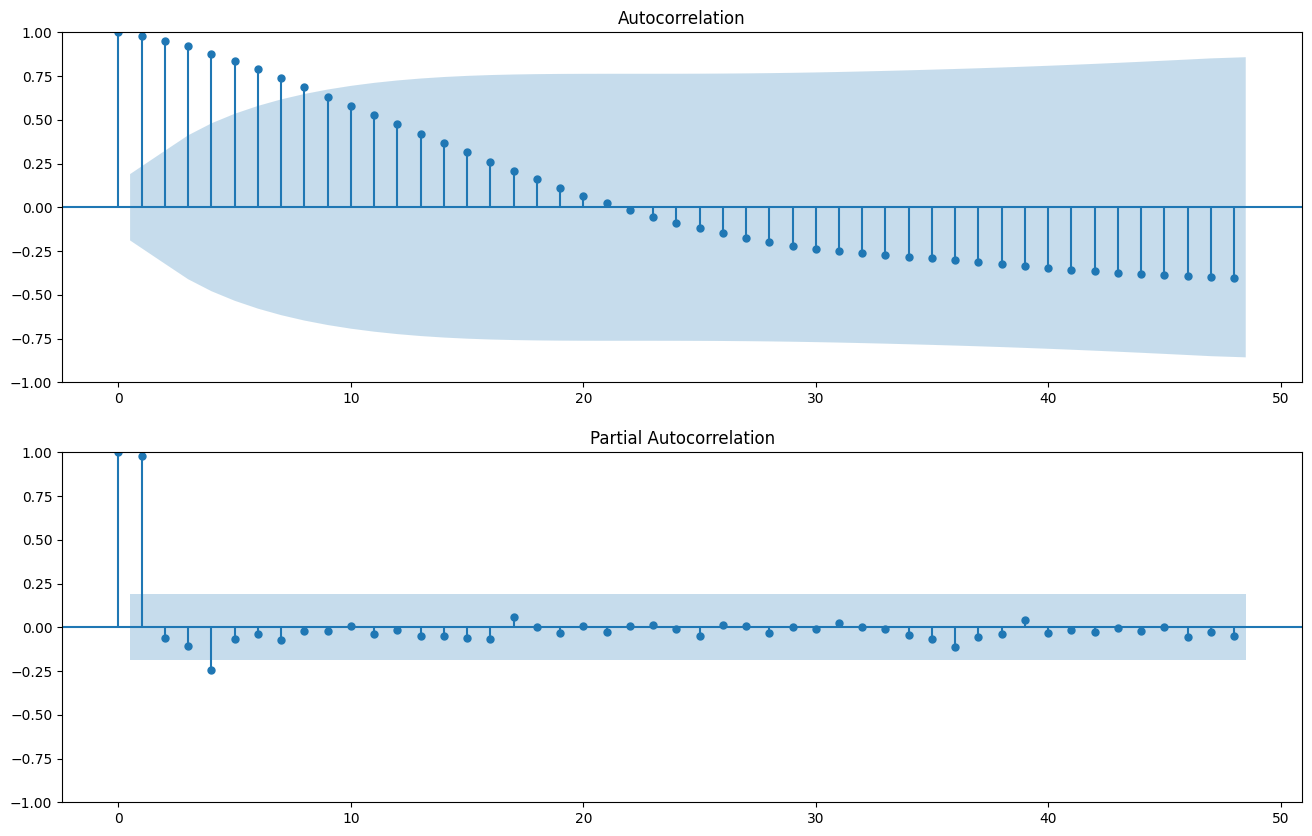

In [21]:
#Plots ACF e PCF
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
plt.subplot(211)
plot_acf(df1['BeneficiariosAtivos'], ax = plt.gca(), lags=48)

# Plot do gráfico PACF
plt.subplot(212)
plot_pacf(df1['BeneficiariosAtivos'], ax = plt.gca(), method = 'ywm', lags=48)
plt.show()

### Teste Dickey-Fuller Aumentado

* Um valor-p menor que 0,05 significa que podemos rejeitar a hipótese nula de que os dados da série temporal não são estacionários. Portanto, a série temporal é estacionária.

* Um valor-p maior que 0,05 significa que não rejeitamos a hipótese nula. Portanto, a série temporal não é estacionária.

In [22]:
# Teste de estacionalidade
result=adfuller(df1['BeneficiariosAtivos'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-2.6053086814125637
p-valor:0.0919050273454296


In [23]:
# Diferenciação é apenas para definir se precisaremos informar o parametro D/d
diff = pd.DataFrame()
diff['BeneficiariosAtivos'] = df1['BeneficiariosAtivos'].diff().dropna()
result=adfuller(diff['BeneficiariosAtivos'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-2.3291403892904543
p-valor:0.16274175716247086


In [24]:
# Diferenciação é apenas para definir se precisaremos informar o parametro D/d
diff2 = pd.DataFrame()
diff2['BeneficiariosAtivos'] = diff['BeneficiariosAtivos'].diff().dropna()
result=adfuller(diff2['BeneficiariosAtivos'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-6.817905595348216
p-valor:2.036813543791147e-09


In [25]:
# Explicar o Auto Arima

In [26]:
# Usando o Auto Arima para conseguir definir os parametros 
fit_arima = auto_arima(df1, 
                       d=1, 
                       start_p=1, 
                       start_q=1, 
                       max_p=3, 
                       max_q=8,
                       max_d=2,
                       seasonal=True,
                       m=12,
                       D=1,
                       start_P=1,
                       start_Q=1,
                       max_P=3,
                       max_Q=3,
                       max_D=2,
                       information_criterion='aic',
                       suppress_warnings=True,
                       trace=True,
                       error_action='ignore',
                       stepwise=False 
                      )

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2496.681, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2499.463, Time=0.08 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=2503.744, Time=0.24 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=2501.593, Time=0.92 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2500.362, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=2502.099, Time=0.10 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=2505.027, Time=0.54 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=2503.593, Time=0.65 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2505.778, Time=0.34 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=2504.713, Time=0.58 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=2508.891, Time=0.64 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=2505.593, Time=1.33 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=2504.974, Time=1.01 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=2506.805, Time=1.34 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=2511.385, Time=1.35

In [27]:
# Verificando o resultado
fit_arima.aic(), fit_arima

(2484.1910838171248,
 ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 1, 0, 12),
       suppress_warnings=True, with_intercept=False))

In [28]:
#Separando Treino e teste
train = df1[0:-12]
test = df1[-12:]
print(f'O tamanho da base de treino ficou em {len(train)} registros e o tamanho da base'
      f'de teste ficou em {len(test)} registros.')

O tamanho da base de treino ficou em 95 registros e o tamanho da basede teste ficou em 12 registros.


In [29]:
# Treinando o Modelo

model_v1 = SARIMAX( train, trend = 'n', order = (1,1,2), seasonal_order = (0,1,0,12))

result_sarimax_v1 = model_v1.fit()

In [30]:
result_sarimax_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                 BeneficiariosAtivos   No. Observations:                   95
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood               -1077.579
Date:                             Tue, 03 Oct 2023   AIC                           2163.158
Time:                                     10:58:31   BIC                           2172.785
Sample:                                 05-01-2014   HQIC                          2167.023
                                      - 03-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8412      0.063     13.276      0.000       0.717       0.965
ma.L1         -0.8388      0.074    -11.307      0.000      -0.984      -0.693
ma.L2          0.0048      0.036      0.134      0.894      -0.066       0.076
sigma2      1.428e+10   4.36e-13   3.27e+22      0.000    1.43e+10    1.43e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.57   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.11   Prob(JB):                         0.92
Heteroskedasticity (H):               1.20   Skew:                             0.07
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.31e+38. Standard errors may be unstable.
"""

In [31]:
# Fazendo as Precições
predicoes = result_sarimax_v1.get_prediction(start=-48)#start=-48
predicao_media = predicoes.predicted_mean

In [32]:
# Intervalo de Confiança
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]
limites_abaixo[0], limites_acima[0]

(46646010.70215617, 47114434.15692411)

In [33]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(train.index)

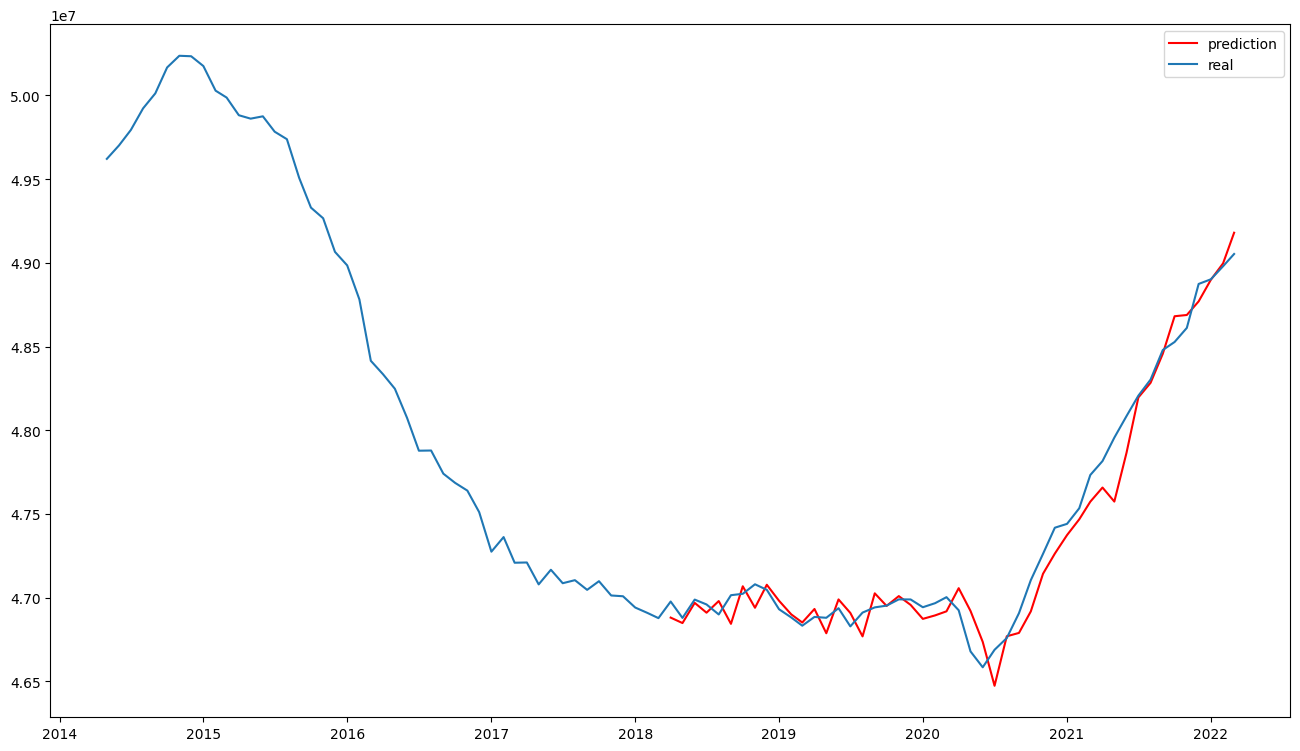

In [34]:
# Plotando o gráfico para efetuar a compração entre o real e predito
plt.figure(figsize=(16,9))
plt.plot(datas_previsao, predicao_media.values, color='red', label='prediction')
plt.plot(datas, train.values, label='real') # plt.plot(datas, train.values, label='real') original
plt.legend()
plt.show()

In [35]:
# Forecast pra 12 values

forecast = result_sarimax_v1.get_forecast(steps=12)
forecast_medio = forecast.predicted_mean
forecast_medio.size

12

In [36]:
round(forecast_medio,0)

2022-04-01    49137260.0
2022-05-01    49277527.0
2022-06-01    49406827.0
2022-07-01    49528650.0
2022-08-01    49625067.0
2022-09-01    49801795.0
2022-10-01    49849921.0
2022-11-01    49934174.0
2022-12-01    50196853.0
2023-01-01    50224690.0
2023-02-01    50302698.0
2023-03-01    50376044.0
Freq: MS, Name: predicted_mean, dtype: float64

### Avaliação do Modelo

In [37]:
print('SARIMAX Treino RMSE = ', sqrt(mean_squared_error(train[-48:].values, predicao_media.values)))

SARIMAX Treino RMSE =  119360.01264893863


Usaremos o RMSE como metrica de avalição, mas o que é essa métrica? <br><br>
A raiz do erro quadrático médio (RMSE ou root mean-square error em inglês) é uma métrica de avaliação amplamente utilizada e reconhecida na comunidade de machine learning para medir o desempenho de modelos de regressão.<br><br>
Ela é calculada tomando-se a raiz quadrada da média dos quadrados dos erros, onde o erro bruto é a diferença entre o valor previsto pelo modelo e valor real.<br><br>

$$RMSE = \sqrt {\frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^2}$$

Onde:

**N** é o número de amostras<br>
**y_i** é o valor observado para a amostra i<br>
**p_i** é o valor previsto pelo modelo para a amostra i<br>

In [38]:
# Verficando o erro RMSE
print('SARIMAX Previsão RMSE = ',sqrt(mean_squared_error(test.values, forecast_medio.values)))

SARIMAX Previsão RMSE =  232080.55313532957


In [39]:
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalo_abaixo_f[0], intervalo_acima_f[0]

(48903048.67293536, 49371472.12770141)

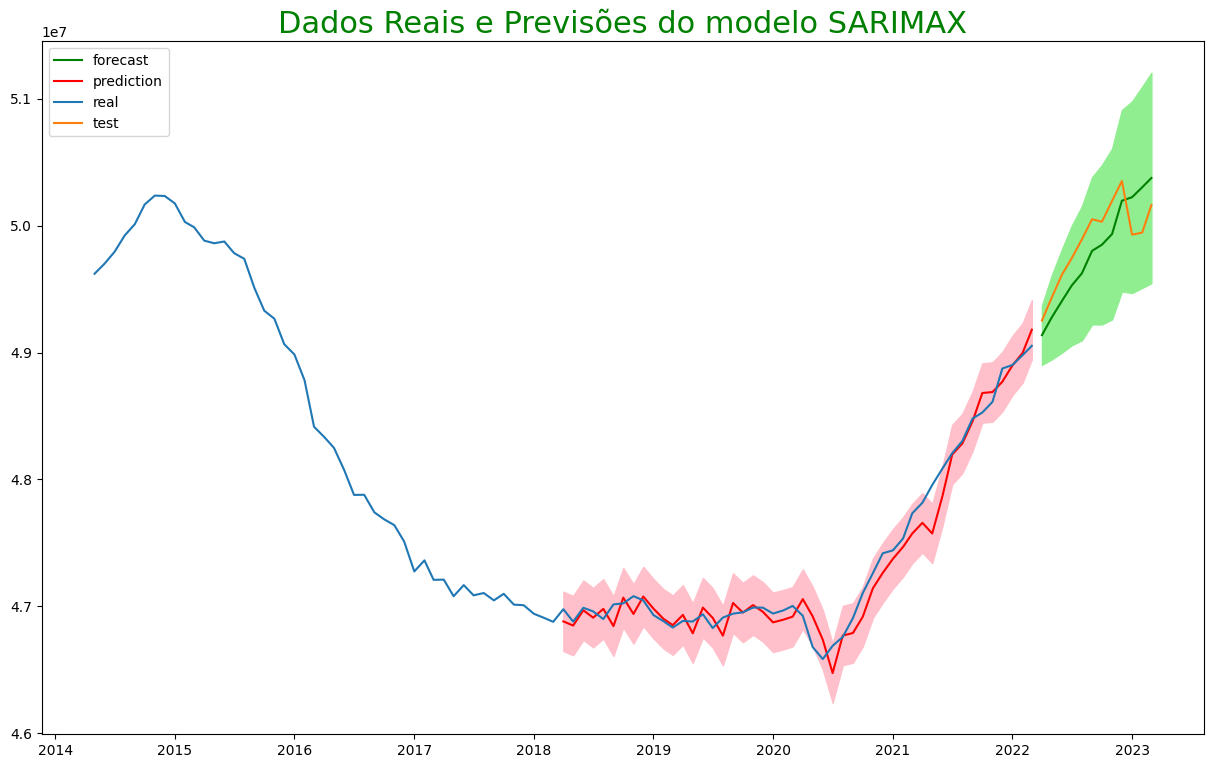

In [40]:
datas_forecast = np.asarray(forecast_medio.index)
pred_dates = np.asarray(predicao_media.index)
dates = np.asarray(train.index)
dates_test = np.asarray(test.index)
plt.figure(figsize=(15,9))
plt.plot(datas_forecast, forecast_medio.values, color='green', label='forecast')
plt.fill_between(datas_forecast, intervalo_abaixo_f, intervalo_acima_f, color='lightgreen')

plt.plot(datas_previsao, predicao_media.values, color='red', label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='pink')

plt.plot(dates, train.values, label='real')
plt.plot(dates_test, test.values, label='test')
plt.legend(loc='upper left')
plt.title("Dados Reais e Previsões do modelo SARIMAX", size=22, color='green')
plt.show()

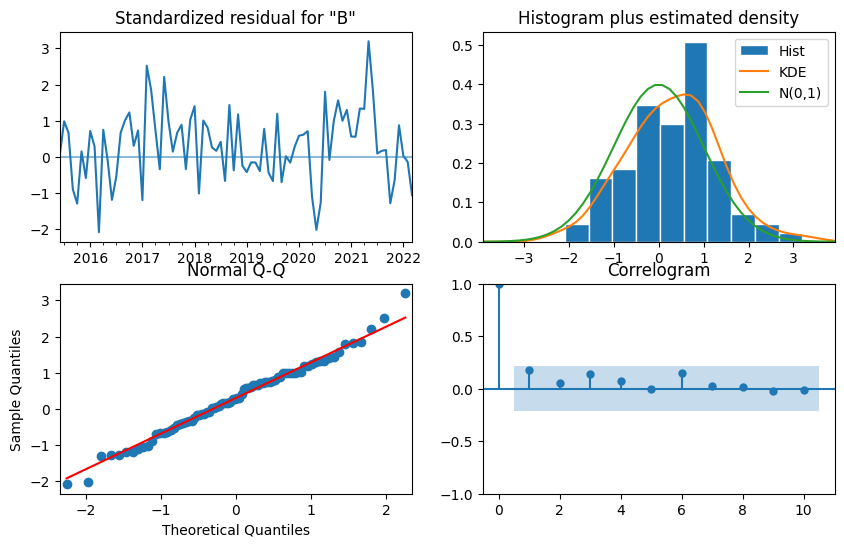

In [41]:
# Analisando os residuos 
result_sarimax_v1.plot_diagnostics(figsize=(10,6));

### Teste de normalidade dos resíduos

Para sabermos se a distribuição dos resíduos é ou não normal precisaremos realizar um teste estatístico chamado Teste de Normalidade *Jarque-Bera*. O teste Jarque-Bera testa se a distribuição dos dados é uma distribuição normal ($H_{0}$) em comparação com uma hipótese alternativa ($H_{1}$) em que os dados seguem alguma outra distribuição. A estatística do teste é baseada em dois momentos dos dados, a assimetria e a curtose, e possui uma $\chi^{2}_{2;1-\alpha}$ distribuição assintótica.

A estatística do teste Jarque-Bera é dada pela equação abaixo:

$S_{JB} = T\bigg[\frac{\alpha_{1}^{2}}{6} + \frac{\big(\alpha_{2} - 3\big)^{2}}{24} \bigg]$, onde $\alpha_{1}$ é o coeficiente de assimetria e $\alpha_{2}$ o coeficiente de curtose.

Se $S_{JB} > \chi^{2}_{2;1-\alpha}$, devemos rejeitar $H_{0}$.

Para os resíduos entre treino e valores preditos o *p-value* ficou abaixo de 5%, logo rejeita-se a hipótese de normalidade. Entretanto irei prosseguir com as análise, porém fica claro que é necessário um outro modelo para essa série temporal.

In [42]:
erros=pd.DataFrame(np.array(predicao_media.values.tolist())-np.array(train[-48:].values.tolist()))

In [43]:
test = jarque_bera(erros)
print('Estatística Jarque-Bera :', test[0][0])
print('p-valor :', test[1][0])
print('Assimetria :', test[2][0])
print('Curtose :',test[3][0])

Estatística Jarque-Bera : 11.088571139453943
p-valor : 0.003909735439809154
Assimetria : -1.1772637385327172
Curtose : 2.9779561920065403


In [44]:
# P-valor é menor que 0,05 então temos indicios para dizer que os residuos são apresentam uma distribuição normal

## Modelo XGBoost

O XGBoost é um algoritmo de aprendizado supervisionado que implementa um processo chamado Boosting para gerar modelos precisos. O aprendizado supervisionado refere-se à tarefa de inferir um modelo preditivo a partir de um conjunto de exemplos de treinamento rotulados, ou seja, o aprendizado supervisionado pode ser considerado como o aprendizado de uma função F(X) = y que rotulará corretamente novas instâncias de entrada. <br><br>
Assim como outros algoritmos de boosting, o XGBoost usa árvores de decisão para seu modelo de conjunto. Cada árvore é um aprendiz fraco. O algoritmo segue construindo sequencialmente mais árvores de decisão, cada uma corrigindo o erro da árvore anterior até que uma condição de parada seja alcançada. Inclui diferentes penalidades de regularização para evitar overfitting onde essas regularizações de penalidade produzem treinamento bem-sucedido para que o modelo possa generalizar adequadamente

In [45]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [46]:
# Função para criar os novos atributos de data
def date_attribute(df):
    #Nessa caso alterei como buscamos a data, porque o campo já passou para index
    df['month'] = df_uf.index.month
    
    return df

In [47]:
# Função para criar os lags
def lag_attribute_uf(df, lag_list, ufs):
    for lag in lag_list:
        for uf in ufs:
            df['lag' + str(lag) + '_' + str(uf)] = df_uf[f'{uf}'].shift(lag)
    
    return df

### Carregando e tratando os dados

#### Script para importação no DB
Os dados que será estudado foi previamente carregado no Banco de Dados.<br>
Nesse processo iremos trazer os dados com um pouco mais de granulariedade e adicionando aos poucos mais campos (variáveis)para efetuar teste de verificar se haverá uma melhora no desenpenho do algoritmo. <br><br>
No momentos será carregadas as seguintes informações:<br><br>
- **AnoMes** - campo que corresponde a competência que os dados representa. <br>
- **UF** - campo que corresponde ao estado. <br>
- **BeneficiariosAtivos** - campo com a somatória de beneficiários ativos por competência. <br>
Nesse estudo estamos agrupandos os beneficiários ativos por competência e estado, trazendo assim, um nível de detalhe maior, pois o XGBoost consegue trabalhar com mais variáveis para efetuar as predições.

Importante resaltar que os dados estarão filtrados pelo campo Cobertura Assistencial Plano, que irá trazer apenas os classificados como "Médico-hospitalar"<br>


In [48]:
# Query usada para trazer os dados
select = ''' SELECT AnoMes, UF, SUM(Qtd_Benef_Ativos) AS BeneficiariosAtivos FROM beneficiariosconsolidadouf
WHERE Cobertura_Assitencial_Plan = "Médico-hospitalar"
GROUP BY AnoMes, UF
'''

In [49]:
df2 = select_base(select)
df3 = df2.copy() # Base para a predição com MLP

In [ ]:
df2.shape

In [50]:
# Primeira mudança sentida, a quantidade de linhas passa de 107 para 2.996

In [51]:
df2.head()

AnoMes  UF  BeneficiariosAtivos
0  201405  AC              44157.0
1  201405  AL             387377.0
2  201405  AM             558708.0
3  201405  AP              71319.0
4  201405  BA            1615218.0

In [52]:
# verificando se a base possui dados faltantes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AnoMes               2996 non-null   int64  
 1   UF                   2996 non-null   object 
 2   BeneficiariosAtivos  2996 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 70.3+ KB


In [53]:
df2['AnoMes'] = df2['AnoMes'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m'))
df2.rename(columns={'AnoMes': 'data'}, inplace = True)
df2.head()

data  UF  BeneficiariosAtivos
0 2014-05-01  AC              44157.0
1 2014-05-01  AL             387377.0
2 2014-05-01  AM             558708.0
3 2014-05-01  AP              71319.0
4 2014-05-01  BA            1615218.0

In [54]:
# Manter o df puro para que não precisar carregar ele diversas vezes
df_uf = df2.copy()
df_uf.head()

data  UF  BeneficiariosAtivos
0 2014-05-01  AC              44157.0
1 2014-05-01  AL             387377.0
2 2014-05-01  AM             558708.0
3 2014-05-01  AP              71319.0
4 2014-05-01  BA            1615218.0

#### Engenharia de Atributos

A engenharia de atributos é um processo de transformação de dados brutos em atributos úteis para o processo de aprendizado de máquina. Tipicamente é um processo amplamente manual que se beneficia de conhecimento do domínio do problema. Pode ser visto como envolvendo pelo menos quatro abordagens: criar atributos, expandir atributos, transformar atributos e selecionar atributos.

##### Atributos Estado

As primeiras variáveis que iremos trabalhar serão os estados, para que o dataset que estamos trabalhando nesse estados fique com a mesma quantidade de linhas que o anterior, iremos efetuar um Pivot na coluna UF, transformando assim em 28 novas colunas (27 estados mais uma coluna denominada XX que são registros que tenho o campos estado no SIB como indeterminado). Com esse acrescemos de variáveis temos como objetivo melhora as previsões do algoritmo.

In [55]:
df_uf = df_uf.pivot(index="data", columns="UF", values="BeneficiariosAtivos")
df_uf.head()

UF               AC        AL        AM       AP         BA         CE  \
data                                                                     
2014-05-01  44157.0  387377.0  558708.0  71319.0  1615218.0  1192504.0   
2014-06-01  44484.0  387874.0  555165.0  71590.0  1637559.0  1200037.0   
2014-07-01  44821.0  388435.0  557591.0  71599.0  1637285.0  1207429.0   
2014-08-01  44640.0  387409.0  559930.0  70703.0  1641615.0  1213814.0   
2014-09-01  44980.0  391130.0  563581.0  70830.0  1652301.0  1232182.0   

UF                DF         ES         GO        MA  ...         RJ  \
data                                                  ...              
2014-05-01  871969.0  1150286.0  1035923.0  466753.0  ...  6081329.0   
2014-06-01  875540.0  1147235.0  1044966.0  467560.0  ...  6078117.0   
2014-07-01  878413.0  1149049.0  1048512.0  473867.0  ...  6073913.0   
2014-08-01  884254.0  1150561.0  1054654.0  477121.0  ...  6082497.0   
2014-09-01  892759.0  1153826.0  1060781.0  481738.0  ...  6080008.0   

UF                RN        RO       RR         RS         SC        SE  \
data                                                                      
2014-05-01  524292.0  185919.0  31967.0  2698636.0  1475860.0  307108.0   
2014-06-01  523315.0  186844.0  32118.0  2695025.0  1477357.0  307423.0   
2014-07-01  524138.0  186978.0  32320.0  2697881.0  1495380.0  308316.0   
2014-08-01  518271.0  187159.0  32429.0  2694995.0  1503007.0  309054.0   
2014-09-01  517264.0  187237.0  32615.0  2691879.0  1506604.0  310213.0   

UF                  SP       TO       XX  
data                                      
2014-05-01  18510506.0  96410.0  17327.0  
2014-06-01  18517962.0  96712.0  17559.0  
2014-07-01  18524674.0  97068.0  19805.0  
2014-08-01  18556070.0  97191.0  20138.0  
2014-09-01  18565360.0  98165.0  20153.0  

[5 rows x 28 columns]

In [56]:
# Criando a coluna Target que é a soma dos valores por estado
df_uf['BeneficiariosTotal'] = df_uf.sum(axis=1)
df_uf.head()

UF               AC        AL        AM       AP         BA         CE  \
data                                                                     
2014-05-01  44157.0  387377.0  558708.0  71319.0  1615218.0  1192504.0   
2014-06-01  44484.0  387874.0  555165.0  71590.0  1637559.0  1200037.0   
2014-07-01  44821.0  388435.0  557591.0  71599.0  1637285.0  1207429.0   
2014-08-01  44640.0  387409.0  559930.0  70703.0  1641615.0  1213814.0   
2014-09-01  44980.0  391130.0  563581.0  70830.0  1652301.0  1232182.0   

UF                DF         ES         GO        MA  ...        RN        RO  \
data                                                  ...                       
2014-05-01  871969.0  1150286.0  1035923.0  466753.0  ...  524292.0  185919.0   
2014-06-01  875540.0  1147235.0  1044966.0  467560.0  ...  523315.0  186844.0   
2014-07-01  878413.0  1149049.0  1048512.0  473867.0  ...  524138.0  186978.0   
2014-08-01  884254.0  1150561.0  1054654.0  477121.0  ...  518271.0  187159.0   
2014-09-01  892759.0  1153826.0  1060781.0  481738.0  ...  517264.0  187237.0   

UF               RR         RS         SC        SE          SP       TO  \
data                                                                       
2014-05-01  31967.0  2698636.0  1475860.0  307108.0  18510506.0  96410.0   
2014-06-01  32118.0  2695025.0  1477357.0  307423.0  18517962.0  96712.0   
2014-07-01  32320.0  2697881.0  1495380.0  308316.0  18524674.0  97068.0   
2014-08-01  32429.0  2694995.0  1503007.0  309054.0  18556070.0  97191.0   
2014-09-01  32615.0  2691879.0  1506604.0  310213.0  18565360.0  98165.0   

UF               XX  BeneficiariosTotal  
data                                     
2014-05-01  17327.0          49621252.0  
2014-06-01  17559.0          49701970.0  
2014-07-01  19805.0          49794137.0  
2014-08-01  20138.0          49923073.0  
2014-09-01  20153.0          50012512.0  

[5 rows x 29 columns]

In [57]:
colunas = list(df_uf.columns)

In [58]:
df_uf.shape

(107, 29)

##### Atributos Date Time

Podemos efetuar a extração de valores do campo data, tais como, ano, mês, dia, semana, quinzena, hora.
Nesse estudo a principio estamos trabalhando apenas com o mês como variável e iremos transforma-lá em uma variável dummy, que nada mais é que uma variável binária, onde cada mês se tornará uma coluna e teremos a informação se aquele registro pertence ou não a aquele mês através de 0 e 1.

In [59]:
df_uf = date_attribute(df_uf)

In [60]:
# Converter variáveis categoricas em variáveis dummy aplicando One-Hot Encoding
df_uf = pd.get_dummies(df_uf, columns = ['month'])

In [61]:
df_uf.head()

AC        AL        AM       AP         BA         CE  \
data                                                                     
2014-05-01  44157.0  387377.0  558708.0  71319.0  1615218.0  1192504.0   
2014-06-01  44484.0  387874.0  555165.0  71590.0  1637559.0  1200037.0   
2014-07-01  44821.0  388435.0  557591.0  71599.0  1637285.0  1207429.0   
2014-08-01  44640.0  387409.0  559930.0  70703.0  1641615.0  1213814.0   
2014-09-01  44980.0  391130.0  563581.0  70830.0  1652301.0  1232182.0   

                  DF         ES         GO        MA  ...  month_3  month_4  \
data                                                  ...                     
2014-05-01  871969.0  1150286.0  1035923.0  466753.0  ...        0        0   
2014-06-01  875540.0  1147235.0  1044966.0  467560.0  ...        0        0   
2014-07-01  878413.0  1149049.0  1048512.0  473867.0  ...        0        0   
2014-08-01  884254.0  1150561.0  1054654.0  477121.0  ...        0        0   
2014-09-01  892759.0  1153826.0  1060781.0  481738.0  ...        0        0   

            month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
data                                                                          
2014-05-01        1        0        0        0        0         0         0   
2014-06-01        0        1        0        0        0         0         0   
2014-07-01        0        0        1        0        0         0         0   
2014-08-01        0        0        0        1        0         0         0   
2014-09-01        0        0        0        0        1         0         0   

            month_12  
data                  
2014-05-01         0  
2014-06-01         0  
2014-07-01         0  
2014-08-01         0  
2014-09-01         0  

[5 rows x 41 columns]

##### Atributos Lag/Shifted



Mudando a série $n$ para trás, obtemos atributos em que o valor atual da série temporal está alinhado com seu valor no tempo $t-n$. Se fizermos uma mudança de 1 lag e treinarmos um modelo com essa nova feature, o modelo poderá prever um passo à frente e observar o estado atual da série. Aumentar o atraso (lag), digamos, até 28, permitirá que o modelo faça previsões 28 passos à frente; no entanto, usará os dados observados nas 28 etapas para trás. Se algo mudar fundamentalmente a série durante esse período não observado, o modelo não capturará essas alterações e retornará previsões com um grande erro. Portanto, durante a seleção do atraso inicial, é preciso encontrar um equilíbrio entre a qualidade ideal da previsão e a duração de previsão.

In [62]:
#Atributos lag/shifted
ufs = list(df2['UF'].unique())
lag_list =[6, 7, 8, 12, 16, 24, 30, 36]

In [63]:
df_uf.shape

(107, 41)

In [64]:
df_uf = lag_attribute_uf(df_uf, lag_list, ufs)
df_uf.head()

AC        AL        AM       AP         BA         CE  \
data                                                                     
2014-05-01  44157.0  387377.0  558708.0  71319.0  1615218.0  1192504.0   
2014-06-01  44484.0  387874.0  555165.0  71590.0  1637559.0  1200037.0   
2014-07-01  44821.0  388435.0  557591.0  71599.0  1637285.0  1207429.0   
2014-08-01  44640.0  387409.0  559930.0  70703.0  1641615.0  1213814.0   
2014-09-01  44980.0  391130.0  563581.0  70830.0  1652301.0  1232182.0   

                  DF         ES         GO        MA  ...  lag36_RJ  lag36_RN  \
data                                                  ...                       
2014-05-01  871969.0  1150286.0  1035923.0  466753.0  ...       NaN       NaN   
2014-06-01  875540.0  1147235.0  1044966.0  467560.0  ...       NaN       NaN   
2014-07-01  878413.0  1149049.0  1048512.0  473867.0  ...       NaN       NaN   
2014-08-01  884254.0  1150561.0  1054654.0  477121.0  ...       NaN       NaN   
2014-09-01  892759.0  1153826.0  1060781.0  481738.0  ...       NaN       NaN   

            lag36_RO  lag36_RR  lag36_RS  lag36_SC  lag36_SE  lag36_SP  \
data                                                                     
2014-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-07-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-08-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-09-01       NaN       NaN       NaN       NaN       NaN       NaN   

            lag36_TO  lag36_XX  
data                            
2014-05-01       NaN       NaN  
2014-06-01       NaN       NaN  
2014-07-01       NaN       NaN  
2014-08-01       NaN       NaN  
2014-09-01       NaN       NaN  

[5 rows x 265 columns]

### Preparando os dados

In [65]:
drop = ['BeneficiariosTotal']
drop.extend(ufs)

In [66]:
#Colunas sem informações úteis ou com informações já derivadas serão descartadas
cols = [col for col in df_uf.columns if col not in colunas]

In [67]:
df_uf.head(20)

AC        AL        AM       AP         BA         CE  \
data                                                                     
2014-05-01  44157.0  387377.0  558708.0  71319.0  1615218.0  1192504.0   
2014-06-01  44484.0  387874.0  555165.0  71590.0  1637559.0  1200037.0   
2014-07-01  44821.0  388435.0  557591.0  71599.0  1637285.0  1207429.0   
2014-08-01  44640.0  387409.0  559930.0  70703.0  1641615.0  1213814.0   
2014-09-01  44980.0  391130.0  563581.0  70830.0  1652301.0  1232182.0   
2014-10-01  45369.0  393437.0  567825.0  71836.0  1654359.0  1244753.0   
2014-11-01  45812.0  392245.0  564886.0  72133.0  1662316.0  1251966.0   
2014-12-01  46013.0  394735.0  567737.0  71771.0  1667316.0  1261421.0   
2015-01-01  46174.0  394215.0  561796.0  74670.0  1664242.0  1264992.0   
2015-02-01  46032.0  395542.0  564821.0  71037.0  1667531.0  1229232.0   
2015-03-01  46048.0  394613.0  549109.0  70364.0  1662222.0  1231248.0   
2015-04-01  45910.0  390951.0  545683.0  69200.0  1661195.0  1234968.0   
2015-05-01  45905.0  396718.0  549370.0  70236.0  1653253.0  1251028.0   
2015-06-01  45923.0  398287.0  546496.0  70179.0  1657561.0  1259362.0   
2015-07-01  44299.0  400667.0  542130.0  74489.0  1652285.0  1258332.0   
2015-08-01  44207.0  401004.0  536550.0  73171.0  1662130.0  1267953.0   
2015-09-01  44162.0  400829.0  539033.0  74569.0  1662372.0  1269116.0   
2015-10-01  43687.0  400410.0  531154.0  74467.0  1660657.0  1262148.0   
2015-11-01  43775.0  399822.0  524658.0  73774.0  1652092.0  1262902.0   
2015-12-01  43909.0  401686.0  523863.0  72975.0  1652194.0  1260733.0   

                  DF         ES         GO        MA  ...  lag36_RJ  lag36_RN  \
data                                                  ...                       
2014-05-01  871969.0  1150286.0  1035923.0  466753.0  ...       NaN       NaN   
2014-06-01  875540.0  1147235.0  1044966.0  467560.0  ...       NaN       NaN   
2014-07-01  878413.0  1149049.0  1048512.0  473867.0  ...       NaN       NaN   
2014-08-01  884254.0  1150561.0  1054654.0  477121.0  ...       NaN       NaN   
2014-09-01  892759.0  1153826.0  1060781.0  481738.0  ...       NaN       NaN   
2014-10-01  903018.0  1154943.0  1063055.0  482718.0  ...       NaN       NaN   
2014-11-01  909945.0  1162158.0  1070380.0  481729.0  ...       NaN       NaN   
2014-12-01  916190.0  1155434.0  1091849.0  481612.0  ...       NaN       NaN   
2015-01-01  917050.0  1156696.0  1070812.0  481283.0  ...       NaN       NaN   
2015-02-01  915635.0  1147164.0  1093567.0  481116.0  ...       NaN       NaN   
2015-03-01  923407.0  1143794.0  1094114.0  478301.0  ...       NaN       NaN   
2015-04-01  927149.0  1143123.0  1100846.0  478328.0  ...       NaN       NaN   
2015-05-01  922083.0  1140593.0  1106839.0  477949.0  ...       NaN       NaN   
2015-06-01  925545.0  1136234.0  1112247.0  489634.0  ...       NaN       NaN   
2015-07-01  920791.0  1129074.0  1113647.0  490567.0  ...       NaN       NaN   
2015-08-01  938491.0  1130892.0  1119572.0  494669.0  ...       NaN       NaN   
2015-09-01  935961.0  1127526.0  1121015.0  494492.0  ...       NaN       NaN   
2015-10-01  928672.0  1119309.0  1120958.0  493583.0  ...       NaN       NaN   
2015-11-01  927004.0  1113821.0  1121141.0  490705.0  ...       NaN       NaN   
2015-12-01  906120.0  1110234.0  1110878.0  488337.0  ...       NaN       NaN   

            lag36_RO  lag36_RR  lag36_RS  lag36_SC  lag36_SE  lag36_SP  \
data                                                                     
2014-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-07-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-08-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-09-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-10-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-11-01   

#### Separando a base entre Train/Treino e Test/Teste

In [68]:
# Separando base treino teste
X = df_uf[cols]
Y = df_uf['BeneficiariosTotal']

In [69]:
# Divisão em treino e teste
X_train1, X_test, y_train1, y_test = train_test_split(X, Y, test_size = 0.11, random_state = 1)
len(X_test)

12

In [70]:
# Divisão em treino e validação (75/25)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.25, random_state = 1)

### Treinando modelo

In [71]:
modelo = xgb.XGBRegressor()

In [72]:
modelo_v2 = xgb.XGBRegressor(            
            learning_rate=0.4,
            max_depth=8,
            n_estimators=300,
            #subsample=1,
            #colsample_bynode=1,
            #min_child_weight=1,
            random_state=1,
            )
modelo_v2.fit(X_train,
              y_train,
              eval_set = [(X_val, y_val)],
              verbose = True,
              eval_metric = 'rmse',
              early_stopping_rounds = 20
            )

[0]	validation_0-rmse:28928855.70095
[1]	validation_0-rmse:17399435.20505
[2]	validation_0-rmse:10434633.72640
[3]	validation_0-rmse:6245819.63643
[4]	validation_0-rmse:3845136.89051
[5]	validation_0-rmse:2368486.81122
[6]	validation_0-rmse:1464254.46846
[7]	validation_0-rmse:957143.50521
[8]	validation_0-rmse:646797.80611
[9]	validation_0-rmse:437466.88718
[10]	validation_0-rmse:335219.93461
[11]	validation_0-rmse:297446.34416
[12]	validation_0-rmse:270651.10136
[13]	validation_0-rmse:255896.21806
[14]	validation_0-rmse:249588.86062
[15]	validation_0-rmse:246240.43909
[16]	validation_0-rmse:244482.05216
[17]	validation_0-rmse:244342.40124
[18]	validation_0-rmse:243190.02422
[19]	validation_0-rmse:243237.72851
[20]	validation_0-rmse:243503.44958
[21]	validation_0-rmse:242326.94982
[22]	validation_0-rmse:241922.15859
[23]	validation_0-rmse:241458.46367
[24]	validation_0-rmse:241257.26506
[25]	validation_0-rmse:241090.50085
[26]	validation_0-rmse:241037.99189
[27]	validation_0-rmse:24098

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [73]:
treino = modelo_v2.fit(X_train,
              y_train,
            )

### Efetuando as previsões com o modelo Treinado

In [74]:
#Previsões com o modelo treinado
previsoes_v2 = modelo_v2.predict(X_test)
previsoes_v2

array([46962168., 47121676., 46767280., 46962148., 47047092., 46995848.,
       46900168., 48453964., 47248688., 46925152., 50047256., 47179320.],
      dtype=float32)

In [75]:
#Valores reais
y_test.values

array([46988672., 47209575., 46583382., 46827690., 47103891., 47022400.,
       46930257., 48479139., 47510376., 46884272., 50031204., 47261178.])

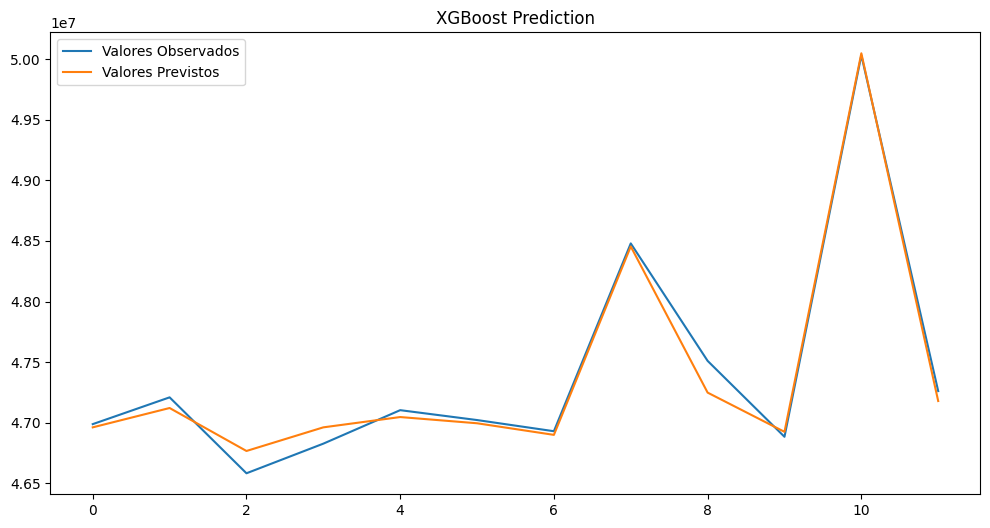

In [76]:
# plot
fig = plt.figure(figsize=(12, 6))
ativos = plt.plot(y_test.values, label = "Valores Observados")
forecast = plt.plot(previsoes_v2, label = "Valores Previstos")
plt.legend(loc = 'best')
plt.title("XGBoost Prediction")
plt.show()

### Avaliação do Modelo

In [77]:
print('XGBoost MAE =', mean_absolute_error(previsoes_v2, y_test.values))

XGBoost MAE = 80987.66666666667


In [78]:
print('XGBoost MSE = ', mean_squared_error(previsoes_v2, y_test.values))

XGBoost MSE =  11908880887.333334


In [79]:
print('XGBoost RMSE = ', sqrt(mean_squared_error(previsoes_v2, y_test.values)))

XGBoost RMSE =  109127.81903498912


In [80]:
def calculate_xgboost_confidence_interval(model, X_test, y_test, confidence_level=0.95):
    # Fazer previsões com o modelo treinado
    y_pred = model.predict(X_test)

    # Calcular os intervalos de confiança
    alpha = 1 - confidence_level
    n = len(X_test)  # tamanho da amostra
    std_error = np.std(y_pred) / np.sqrt(n)  # erro padrão

    # Calcular os limites do intervalo de confiança
    lower_limit = y_pred - (std_error * 1.96)  # 1.96 é o valor crítico para um intervalo de confiança de 95%
    upper_limit = y_pred + (std_error * 1.96)

    # Criar DataFrame com os resultados
    df_pred = pd.DataFrame({'index': X_test.index, 'y_test': y_test, 'Predição': y_pred, 'Limite Inferior': lower_limit, 'Limite Superior': upper_limit}).reset_index()
    df_pred['error']  = df_pred['y_test'] - df_pred['Predição']
    df_pred.set_index('index', inplace=True)
    return df_pred

In [81]:
base = calculate_xgboost_confidence_interval(modelo_v2, X_test, y_test)

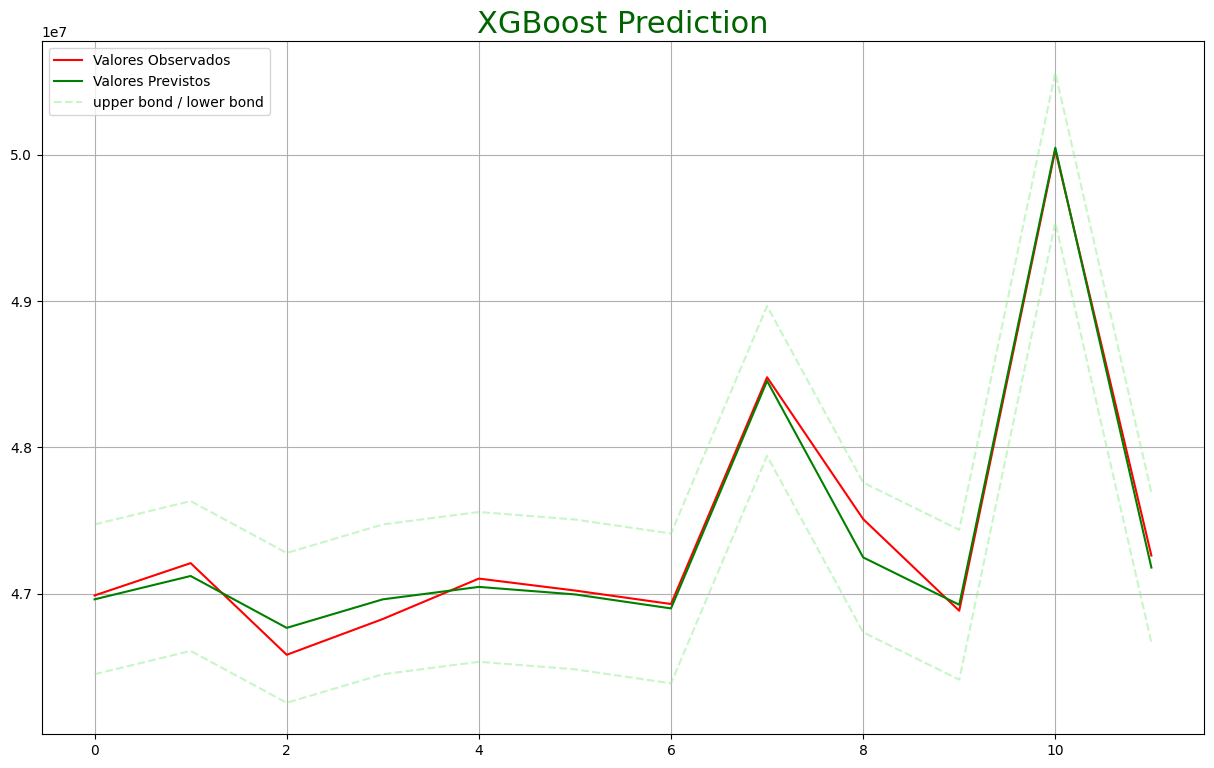

In [82]:
# plot
fig = plt.figure(figsize=(15, 9))
plt.plot(base['y_test'].values, label = "Valores Observados", color="red")
plt.plot(base['Predição'].values, label = "Valores Previstos", color = "green")
#plt.plot(base['error'].values, label = "Valores de erro", color = "blue")
plt.plot(base['Limite Inferior'].values, "r--", label="upper bond / lower bond", alpha=0.5, color='lightgreen')
plt.plot(base['Limite Superior'].values, "r--", alpha=0.5, color='lightgreen')
#plt.fill_between(np.asarray(base.index), base['Limite Inferior'].values, base['Limite Superior'].values, color='whitesmoke')
plt.legend(loc = 'upper left') # 'best'
plt.title("XGBoost Prediction", size=22, color='darkgreen')
plt.grid(True)
plt.show()

In [83]:
treino = modelo_v2.predict(X_train1)
treino

array([49052948., 46951788., 47235932., 48873920., 47085664., 49252364.,
       49330016., 50195512., 48527152., 48084632., 46953928., 46877004.,
       46940380., 47012416., 48206280., 48302536., 47079276., 50163112.,
       49987616., 49982336., 47274120., 49929364., 49065596., 47878600.,
       47078668., 47046244., 49892460., 47191768., 47103744., 47046028.,
       46878308., 46881720., 47147212., 48334236., 47208088., 47002352.,
       48979640., 50051252., 47027424., 49449252., 48361688., 47097772.,
       46899008., 46908176., 49594684., 47014100., 47957368., 49945412.,
       47007776., 46963116., 48247752., 50012504., 47815544., 49441448.,
       46987796., 49014876., 49923072., 47639028., 46880028., 47732264.,
       50175924., 46879104., 49621252., 49614060., 46881100., 48414668.,
       46936436., 46972448., 50234512., 50352464., 49875528., 46942184.,
       48901692., 49456412., 47923524., 47740316., 49882036., 47954064.,
       49266424., 48984888., 46958812., 48073304., 

In [84]:
base2 = calculate_xgboost_confidence_interval(modelo_v2, X_train1, y_train1)


In [85]:
base3 = pd.concat([base2, base])

In [86]:
base3.sort_index(inplace=True)

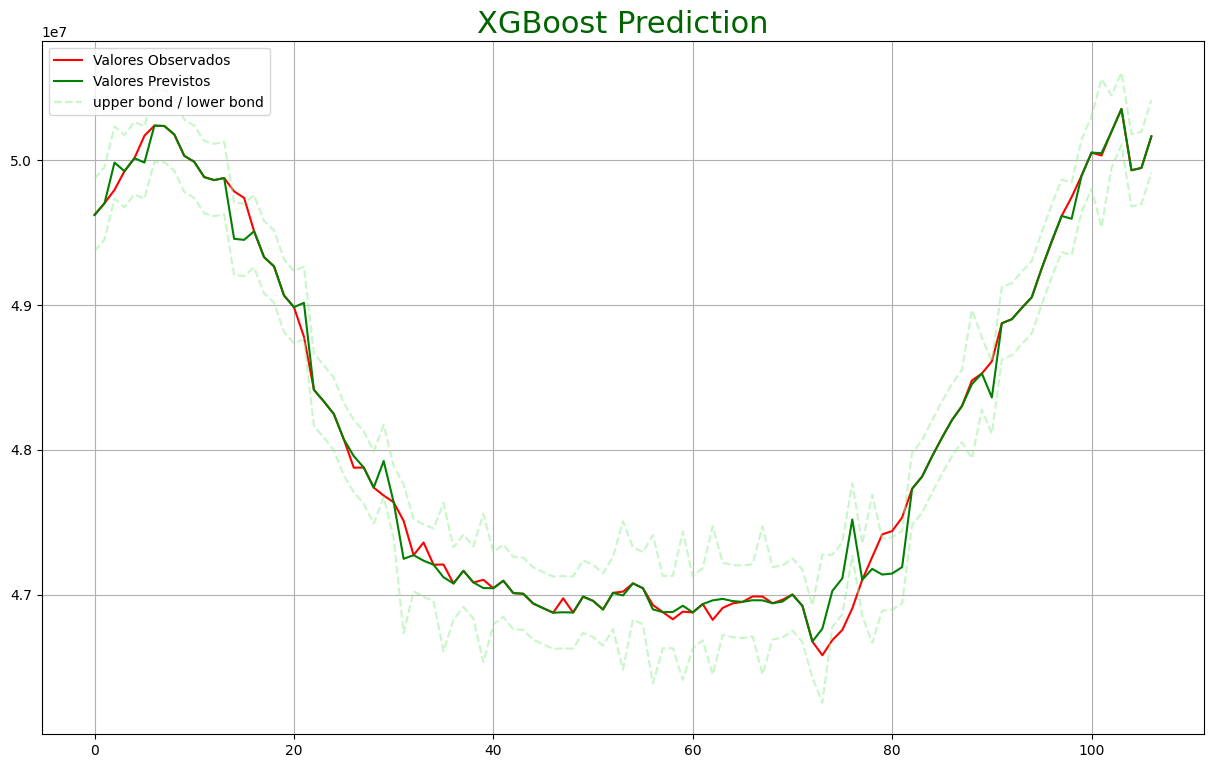

In [87]:
# plot
fig = plt.figure(figsize=(15, 9))
plt.plot(base3['y_test'].values, label = "Valores Observados", color="red")
plt.plot(base3['Predição'].values, label = "Valores Previstos", color = "green")
#plt.plot(base['error'].values, label = "Valores de erro", color = "blue")
plt.plot(base3['Limite Inferior'].values, "r--", label="upper bond / lower bond", alpha=0.5, color='lightgreen')
plt.plot(base3['Limite Superior'].values, "r--", alpha=0.5, color='lightgreen')
#plt.fill_between(np.asarray(base.index), base['Limite Inferior'].values, base['Limite Superior'].values, color='whitesmoke')
plt.legend(loc = 'upper left') # 'best'
plt.title("XGBoost Prediction", size=22, color='darkgreen')
plt.grid(True)
plt.show()

## Modelo MLP - NeuralForecast

In [88]:
# Fazer um explicativo desse modelo

In [89]:
def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [90]:
import torch
from typing import Union

class WMAPE(torch.nn.Module):

    def __init__(self):
        super(WMAPE, self).__init__()
        self.outputsize_multiplier = 1
        self.output_names = [""]
        self.is_distribution_output = False

    def domain_map(self, y_hat: torch.Tensor):
        return y_hat.squeeze(-1)

    def __call__(
        self,
        y: torch.Tensor,
        y_hat: torch.Tensor,
        mask: Union[torch.Tensor, None] = None,
    ):
        if mask is None:
            mask = torch.ones_like(y_hat)

        num = mask * (y - y_hat).abs()
        den = mask * y.abs()
        return num.sum() / den.sum()

In [91]:
df3.head()

AnoMes  UF  BeneficiariosAtivos
0  201405  AC              44157.0
1  201405  AL             387377.0
2  201405  AM             558708.0
3  201405  AP              71319.0
4  201405  BA            1615218.0

In [92]:
df3['AnoMes'] = pd.to_datetime(df3['AnoMes'], format='%Y%m')

In [93]:
df3.head()

AnoMes  UF  BeneficiariosAtivos
0 2014-05-01  AC              44157.0
1 2014-05-01  AL             387377.0
2 2014-05-01  AM             558708.0
3 2014-05-01  AP              71319.0
4 2014-05-01  BA            1615218.0

In [94]:
df3.head()

AnoMes  UF  BeneficiariosAtivos
0 2014-05-01  AC              44157.0
1 2014-05-01  AL             387377.0
2 2014-05-01  AM             558708.0
3 2014-05-01  AP              71319.0
4 2014-05-01  BA            1615218.0

**ds**: data do registro <br>
**y**: variável alvo (número de vendas)<br>
**unique_id**: identificador único da série temporal (categoria do produto)

In [95]:
df3 = df3.rename(columns={'AnoMes': 'ds', 'BeneficiariosAtivos': 'y', 'UF': 'unique_id'})

In [96]:
train = df3.loc[df3['ds'] < '2022-10-01']
valid = df3.loc[df3['ds'] >= '2022-10-01']

In [128]:
# a variável h é quantos passos queremos prever. Nesse exmplo iremos marcar para prever 06 meses
## para frente
h = valid['ds'].nunique()

In [129]:
models = [
    
            AutoMLP(h=h,
                   num_samples=10,
                   loss=WMAPE())
         ]

In [130]:
model = NeuralForecast(models=models, freq='M')
model.fit(train)

(train_tune pid=15288) Global seed set to 18


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 163.32it/s, v_num=0, train_loss_step=0.543, train_loss_epoch=0.444]
Validation: 0it [00:00, ?it/s]0m 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 121.04it/s, v_num=0, train_loss_step=0.508, train_loss_epoch=0.607, valid_loss=0.405]
Validation: 0it [00:00, ?it/s]0m 
Epoch 222:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.456, train_loss_epoch=0.456, valid_loss=0.471]         


Epoch 246:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.458, train_loss_epoch=0.458, valid_loss=0.471]


Epoch 275:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.441, train_loss_epoch=0.441, valid_loss=0.471]


Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 132.66it/s, v_num=0, train_loss_step=0.530, train_loss_epoch=0.435, valid_loss=0.471]
(train_tune pid=15288) 
Validation: 0it [00:00, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 55.38it/s, v_num=0, train_loss_step=0.530, train_loss_epoch=0.435, valid_loss=0.525] 
                                                                       
Epoch 300:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.530, train_loss_epoch=0.530, valid_loss=0.525]


Epoch 327:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.535, train_loss_epoch=0.535, valid_loss=0.525]


Epoch 355:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.418, train_loss_epoch=0.418, valid_loss=0.525]


Epoch 383:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.471, train_loss_epoch=0.471, valid_loss=0.525]


Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 110.57it/s, v_num=0, train_loss_step=0.430, train_loss_epoch=0.424, valid_loss=0.525]
Validation: 0it [00:00, ?it/s]
Epoch 411:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.439, train_loss_epoch=0.439, valid_loss=0.480]


Epoch 444:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.404, train_loss_epoch=0.404, valid_loss=0.480]


Epoch 476:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.460, train_loss_epoch=0.460, valid_loss=0.480]


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 132.32it/s, v_num=0, train_loss_step=0.412, train_loss_epoch=0.404, valid_loss=0.480]
Validation: 0it [00:00, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 38.99it/s, v_num=0, train_loss_step=0.412, train_loss_epoch=0.412, valid_loss=0.487]


(train_tune pid=15288) Global seed set to 18


Epoch 14:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000]


Epoch 41: 100%|██████████| 1/1 [00:00<00:00, 89.89it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.997]


Epoch 59:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.993]


Epoch 86:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.994, train_loss_epoch=0.994]


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 99.03it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.986]
(train_tune pid=15288) 
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 43.52it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.986, valid_loss=0.856]
                                                                       


Epoch 120:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.995, train_loss_epoch=0.995, valid_loss=0.856]


Epoch 143:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.993, valid_loss=0.856]


Epoch 171: 100%|██████████| 1/1 [00:00<00:00, 147.35it/s, v_num=0, train_loss_step=0.991, train_loss_epoch=0.991, valid_loss=0.856]


Epoch 185:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=0.999, valid_loss=0.856]


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 108.25it/s, v_num=0, train_loss_step=0.994, train_loss_epoch=0.989, valid_loss=0.856]
Validation: 0it [00:00, ?it/s]
Epoch 210:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.849]


Epoch 234:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.997, valid_loss=0.849]


Epoch 258:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.997, valid_loss=0.849]


Epoch 280:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.993, valid_loss=0.849]


Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 100.94it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.991, valid_loss=0.849]
Validation: 0it [00:00, ?it/s]
Epoch 303:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.991, train_loss_epoch=0.991, valid_loss=0.887]


Epoch 327:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.993, valid_loss=0.887]


Epoch 348:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.990, train_loss_epoch=0.990, valid_loss=0.887]


Epoch 375:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.995, train_loss_epoch=0.995, valid_loss=0.887]


Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 103.34it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.991, valid_loss=0.887]
Validation: 0it [00:00, ?it/s]
(train_tune pid=15288) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 57.61it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.991, valid_loss=0.867] 
                                                                       


Epoch 427: 100%|██████████| 1/1 [00:00<00:00, 117.47it/s, v_num=0, train_loss_step=0.995, train_loss_epoch=0.995, valid_loss=0.867]


Epoch 445:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.994, train_loss_epoch=0.994, valid_loss=0.867]


Epoch 459:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.867]


Epoch 486: 100%|██████████| 1/1 [00:00<00:00, 132.76it/s, v_num=0, train_loss_step=0.995, train_loss_epoch=0.995, valid_loss=0.867]


Epoch 499:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.867]


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 70.28it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=1.000, valid_loss=0.867]
Validation: 0it [00:00, ?it/s]
Epoch 521:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.994, train_loss_epoch=0.994, valid_loss=0.900]


Epoch 545:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996, valid_loss=0.900]


Epoch 570:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=0.999, valid_loss=0.900]


Epoch 591:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=0.999, valid_loss=0.900]


Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 86.77it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.994, valid_loss=0.900] 
Validation: 0it [00:00, ?it/s]
Epoch 614:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.993, valid_loss=0.888]


Epoch 639:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.995, train_loss_epoch=0.995, valid_loss=0.888]


Epoch 665:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996, valid_loss=0.888]


Epoch 689:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.994, train_loss_epoch=0.994, valid_loss=0.888]


Epoch 699: 100%|██████████| 1/1 [00:00<00:00, 95.00it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.998, valid_loss=0.888] 
(train_tune pid=15288) 
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 699: 100%|██████████| 1/1 [00:00<00:00, 51.68it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.998, valid_loss=0.873]
                                                                       
Epoch 713:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.997, valid_loss=0.873]


Epoch 739:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996, valid_loss=0.873]


Epoch 766:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.994, train_loss_epoch=0.994, valid_loss=0.873]


Epoch 794:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.997, valid_loss=0.873]


Epoch 799: 100%|██████████| 1/1 [00:00<00:00, 94.05it/s, v_num=0, train_loss_step=0.994, train_loss_epoch=0.999, valid_loss=0.873] 
Validation: 0it [00:00, ?it/s]
Epoch 818:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.898]


Epoch 839:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.992, train_loss_epoch=0.992, valid_loss=0.898]


Epoch 866:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996, valid_loss=0.898]


Epoch 885:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.994, train_loss_epoch=0.994, valid_loss=0.898]


Epoch 899: 100%|██████████| 1/1 [00:00<00:00, 97.95it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996, valid_loss=0.898] 
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 899: 100%|██████████| 1/1 [00:00<00:00, 53.40it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996, valid_loss=0.898]
                                                                       
Epoch 913:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.990, train_loss_epoch=0.990, valid_loss=0.898]


Epoch 931:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996, valid_loss=0.898]


Epoch 955:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.993, valid_loss=0.898]


Epoch 982: 100%|██████████| 1/1 [00:00<00:00, 276.65it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.997, valid_loss=0.898]


Epoch 998:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.995, train_loss_epoch=0.995, valid_loss=0.898]


(train_tune pid=15288) Global seed set to 8


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 150.82it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.993, valid_loss=0.898]
Validation: 0it [00:00, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
                                                                            
Epoch 11:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=2.100, train_loss_epoch=2.100]


Epoch 39:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996]


Epoch 56:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.010]


Epoch 84:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996]


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 93.13it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000] 
Validation: 0it [00:00, ?it/s]
Epoch 111:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.977]


Epoch 124:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.977]


Epoch 150:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=0.999, valid_loss=0.977]


Epoch 177: 100%|██████████| 1/1 [00:00<00:00, 191.75it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.977]


Epoch 192:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.977]


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 94.98it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.991, valid_loss=0.977] 
Validation: 0it [00:00, ?it/s]
Epoch 218:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.881]


Epoch 245:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.995, train_loss_epoch=0.995, valid_loss=0.881]


Epoch 273:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.881]


Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 86.83it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.994, valid_loss=0.881] 
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 52.36it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.994, valid_loss=0.923]
                                                                       


Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 103.26it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.999, valid_loss=0.923]
Validation: 0it [00:00, ?it/s]0m 
Epoch 472:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.885]         


Epoch 493:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=0.999, valid_loss=0.885]


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 104.75it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.999, valid_loss=0.885]
Validation: 0it [00:00, ?it/s]
Epoch 517:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=0.999, valid_loss=0.972]


Epoch 539:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.972]


Epoch 566:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.972]


Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 104.07it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=1.000, valid_loss=0.972]
(train_tune pid=15288) 
Validation: 0it [00:00, ?it/s]0m 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 52.29it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=1.000, valid_loss=0.875] 
                                                                       
Epoch 699: 100%|██████████| 1/1 [00:00<00:00, 83.04it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.999, valid_loss=0.875] 
(train_tune pid=15288) 
Validation: 0it [00:00, ?it/s]0m 
Epoch 699: 100%|██████████| 1/1 [00:00<00:00, 44.27it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.999, valid_loss=0.929]
                                                                       
Epoch 757:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.929]    

Epoch 783:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=0.999, valid_loss=0.929]


Epoch 799: 100%|██████████| 1/1 [00:00<00:00, 104.90it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=1.000, valid_loss=0.929]
Validation: 0it [00:00, ?it/s]
Epoch 806:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.933]


Epoch 828:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.933]


Epoch 852:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.933]


Epoch 877:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.995, train_loss_epoch=0.995, valid_loss=0.933]


Epoch 899:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.933]


Epoch 899: 100%|██████████| 1/1 [00:00<00:00, 95.10it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.998, valid_loss=0.933] 
Validation: 0it [00:00, ?it/s]
Epoch 922:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.997, valid_loss=0.945]


Epoch 944:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.945]


Epoch 965:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.945]


Epoch 987:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.997, valid_loss=0.945]


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 86.75it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.997, valid_loss=0.945] 
Validation: 0it [00:00, ?it/s]
Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 33.73it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.947]


(train_tune pid=15288) Global seed set to 6


Epoch 24:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.483, train_loss_epoch=0.483]


Epoch 57:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.429, train_loss_epoch=0.429]


Epoch 96: 100%|██████████| 1/1 [00:00<00:00, 132.69it/s, v_num=0, train_loss_step=0.415, train_loss_epoch=0.415]


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 132.74it/s, v_num=0, train_loss_step=0.393, train_loss_epoch=0.406]
Validation: 0it [00:00, ?it/s]
(train_tune pid=15288) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 60.32it/s, v_num=0, train_loss_step=0.393, train_loss_epoch=0.406, valid_loss=0.335]
                                                                       
Epoch 114:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.345, train_loss_epoch=0.345, valid_loss=0.335]


Epoch 154:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.281, train_loss_epoch=0.281, valid_loss=0.335]


Epoch 174:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.297, train_loss_epoch=0.297, valid_loss=0.335]


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 235.53it/s, v_num=0, train_loss_step=0.281, train_loss_epoch=0.303, valid_loss=0.335]
Validation: 0it [00:00, ?it/s]
Epoch 206:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.289, train_loss_epoch=0.289, valid_loss=0.384]


Epoch 240:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.244, train_loss_epoch=0.244, valid_loss=0.384]


Epoch 270:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.239, train_loss_epoch=0.239, valid_loss=0.384]


Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 163.23it/s, v_num=0, train_loss_step=0.216, train_loss_epoch=0.237, valid_loss=0.384]
Validation: 0it [00:00, ?it/s]
Epoch 312:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.218, train_loss_epoch=0.218, valid_loss=0.435]


Epoch 353:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.198, train_loss_epoch=0.198, valid_loss=0.435]


Epoch 392:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.183, train_loss_epoch=0.183, valid_loss=0.435]


Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 153.18it/s, v_num=0, train_loss_step=0.200, train_loss_epoch=0.174, valid_loss=0.435]
Validation: 0it [00:00, ?it/s]
Epoch 432: 100%|██████████| 1/1 [00:00<00:00, 153.49it/s, v_num=0, train_loss_step=0.193, train_loss_epoch=0.193, valid_loss=0.366]


Epoch 459:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.167, train_loss_epoch=0.167, valid_loss=0.366]


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 133.08it/s, v_num=0, train_loss_step=0.142, train_loss_epoch=0.133, valid_loss=0.366]
Validation: 0it [00:00, ?it/s]
(train_tune pid=15288) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 66.57it/s, v_num=0, train_loss_step=0.142, train_loss_epoch=0.133, valid_loss=0.432] 
                                                                       


Epoch 524:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.140, train_loss_epoch=0.140, valid_loss=0.432]


Epoch 562:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.165, train_loss_epoch=0.165, valid_loss=0.432]


Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 181.17it/s, v_num=0, train_loss_step=0.144, train_loss_epoch=0.171, valid_loss=0.432]
Validation: 0it [00:00, ?it/s]
Epoch 603: 100%|██████████| 1/1 [00:00<00:00, 274.69it/s, v_num=0, train_loss_step=0.133, train_loss_epoch=0.133, valid_loss=0.372]


Epoch 631:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.137, train_loss_epoch=0.137, valid_loss=0.372]


Epoch 650:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.129, train_loss_epoch=0.129, valid_loss=0.372]


Epoch 685:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.122, train_loss_epoch=0.122, valid_loss=0.372]


Epoch 699: 100%|██████████| 1/1 [00:00<00:00, 166.44it/s, v_num=0, train_loss_step=0.137, train_loss_epoch=0.119, valid_loss=0.372]
Validation: 0it [00:00, ?it/s]
Epoch 699: 100%|██████████| 1/1 [00:00<00:00, 73.96it/s, v_num=0, train_loss_step=0.137, train_loss_epoch=0.119, valid_loss=0.386] 
                                                                       
Epoch 722: 100%|██████████| 1/1 [00:00<00:00, 153.05it/s, v_num=0, train_loss_step=0.119, train_loss_epoch=0.119, valid_loss=0.386]


Epoch 743:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.115, train_loss_epoch=0.115, valid_loss=0.386]


Epoch 777:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.103, train_loss_epoch=0.103, valid_loss=0.386]


Epoch 799: 100%|██████████| 1/1 [00:00<00:00, 149.76it/s, v_num=0, train_loss_step=0.096, train_loss_epoch=0.0951, valid_loss=0.386] 
Validation: 0it [00:00, ?it/s]
Epoch 815: 100%|██████████| 1/1 [00:00<00:00, 180.51it/s, v_num=0, train_loss_step=0.103, train_loss_epoch=0.103, valid_loss=0.443]


Epoch 838:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0887, train_loss_epoch=0.0887, valid_loss=0.443]


Epoch 881:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0979, train_loss_epoch=0.0979, valid_loss=0.443]


Epoch 899:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0867, train_loss_epoch=0.0867, valid_loss=0.443]


Epoch 899: 100%|██████████| 1/1 [00:00<00:00, 138.03it/s, v_num=0, train_loss_step=0.0972, train_loss_epoch=0.0867, valid_loss=0.443]
Validation: 0it [00:00, ?it/s]
Epoch 939:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0865, train_loss_epoch=0.0865, valid_loss=0.407]


Epoch 958:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0847, train_loss_epoch=0.0847, valid_loss=0.407]


Epoch 984:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0819, train_loss_epoch=0.0819, valid_loss=0.407]


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 128.24it/s, v_num=0, train_loss_step=0.0845, train_loss_epoch=0.0933, valid_loss=0.407]
Validation: 0it [00:00, ?it/s]
Epoch 2:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996]


(train_tune pid=15288) Global seed set to 4


Epoch 26:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.481, train_loss_epoch=0.481]


Epoch 64:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.391, train_loss_epoch=0.391]


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 132.72it/s, v_num=0, train_loss_step=0.352, train_loss_epoch=0.397]
Validation: 0it [00:00, ?it/s]
Epoch 103:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.387, train_loss_epoch=0.387, valid_loss=0.289]


Epoch 133:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.363, train_loss_epoch=0.363, valid_loss=0.289]


Epoch 171:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.333, train_loss_epoch=0.333, valid_loss=0.289]


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 178.88it/s, v_num=0, train_loss_step=0.295, train_loss_epoch=0.298, valid_loss=0.289]
Validation: 0it [00:00, ?it/s]
Epoch 207: 100%|██████████| 1/1 [00:00<00:00, 153.18it/s, v_num=0, train_loss_step=0.334, train_loss_epoch=0.334, valid_loss=0.317]


Epoch 228:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.300, train_loss_epoch=0.300, valid_loss=0.317]


Epoch 262:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.297, train_loss_epoch=0.297, valid_loss=0.317]


Epoch 293:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.273, train_loss_epoch=0.273, valid_loss=0.317]


Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 142.71it/s, v_num=0, train_loss_step=0.300, train_loss_epoch=0.284, valid_loss=0.317]
Validation: 0it [00:00, ?it/s]
Epoch 325:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.244, train_loss_epoch=0.244, valid_loss=0.336]


Epoch 367:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.225, train_loss_epoch=0.225, valid_loss=0.336]


Epoch 388:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.241, train_loss_epoch=0.241, valid_loss=0.336]


Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 166.55it/s, v_num=0, train_loss_step=0.242, train_loss_epoch=0.230, valid_loss=0.336]
Validation: 0it [00:00, ?it/s]
Epoch 415:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.242, train_loss_epoch=0.242, valid_loss=0.362]


Epoch 449: 100%|██████████| 1/1 [00:00<00:00, 142.81it/s, v_num=0, train_loss_step=0.202, train_loss_epoch=0.202, valid_loss=0.362]


Epoch 474:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.208, train_loss_epoch=0.208, valid_loss=0.362]


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 129.83it/s, v_num=0, train_loss_step=0.183, train_loss_epoch=0.214, valid_loss=0.362]
(train_tune pid=15288) 
Validation: 0it [00:00, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 65.68it/s, v_num=0, train_loss_step=0.183, train_loss_epoch=0.214, valid_loss=0.349] 
                                                                       
Epoch 505:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.219, train_loss_epoch=0.219, valid_loss=0.349]


Epoch 528:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.197, train_loss_epoch=0.197, valid_loss=0.349]


Epoch 555:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.202, train_loss_epoch=0.202, valid_loss=0.349]


Epoch 593:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.188, train_loss_epoch=0.188, valid_loss=0.349]


Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 166.41it/s, v_num=0, train_loss_step=0.212, train_loss_epoch=0.181, valid_loss=0.349]
Validation: 0it [00:00, ?it/s]
Epoch 613:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.200, train_loss_epoch=0.200, valid_loss=0.386]


Epoch 650:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.184, train_loss_epoch=0.184, valid_loss=0.386]


Epoch 680:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.181, train_loss_epoch=0.181, valid_loss=0.386]


Epoch 699: 100%|██████████| 1/1 [00:00<00:00, 134.20it/s, v_num=0, train_loss_step=0.174, train_loss_epoch=0.177, valid_loss=0.386]
Validation: 0it [00:00, ?it/s]
Epoch 708:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.178, train_loss_epoch=0.178, valid_loss=0.403]


Epoch 733:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.169, train_loss_epoch=0.169, valid_loss=0.403]


Epoch 758:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.181, train_loss_epoch=0.181, valid_loss=0.403]


Epoch 786:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.177, train_loss_epoch=0.177, valid_loss=0.403]


Epoch 799: 100%|██████████| 1/1 [00:00<00:00, 124.20it/s, v_num=0, train_loss_step=0.193, train_loss_epoch=0.163, valid_loss=0.403]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 799: 100%|██████████| 1/1 [00:00<00:00, 64.13it/s, v_num=0, train_loss_step=0.193, train_loss_epoch=0.163, valid_loss=0.421] 
                                                                       
Epoch 816:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.162, train_loss_epoch=0.162, valid_loss=0.421]


Epoch 848:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.167, train_loss_epoch=0.167, valid_loss=0.421]


Epoch 882:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.158, train_loss_epoch=0.158, valid_loss=0.421]


Epoch 899: 100%|██████████| 1/1 [00:00<00:00, 142.42it/s, v_num=0, train_loss_step=0.148, train_loss_epoch=0.154, valid_loss=0.421]
Validation: 0it [00:00, ?it/s]
Epoch 913:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.149, train_loss_epoch=0.149, valid_loss=0.345]


Epoch 950:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.173, train_loss_epoch=0.173, valid_loss=0.345]


Epoch 967:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.158, train_loss_epoch=0.158, valid_loss=0.345]


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 142.88it/s, v_num=0, train_loss_step=0.141, train_loss_epoch=0.159, valid_loss=0.345]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 60.25it/s, v_num=0, train_loss_step=0.141, train_loss_epoch=0.159, valid_loss=0.378] 
                                                                       
Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 41.13it/s, v_num=0, train_loss_step=0.141, train_loss_epoch=0.141, valid_loss=0.378]


(train_tune pid=15288) Global seed set to 9


Epoch 15:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.010]


Epoch 36:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.120, train_loss_epoch=1.120]


Epoch 58:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.988, train_loss_epoch=0.988]


Epoch 80:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.050, train_loss_epoch=1.050]


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 110.65it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=1.000]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 46.94it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=1.000, valid_loss=0.908]
                                                                       


Epoch 120:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.010, valid_loss=0.908]


Epoch 140:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.908]


Epoch 161:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.010, valid_loss=0.908]


Epoch 183:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.995, train_loss_epoch=0.995, valid_loss=0.908]


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 107.87it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=1.000, valid_loss=0.908]
Validation: 0it [00:00, ?it/s]
Epoch 203:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=1.020]


Epoch 224:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=0.996, valid_loss=1.020]


Epoch 245:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=1.020]


Epoch 269:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.989, train_loss_epoch=0.989, valid_loss=1.020]


Epoch 290:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=1.020]


Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 79.92it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.994, valid_loss=1.020]
Validation: 0it [00:00, ?it/s]
Epoch 308:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.982, train_loss_epoch=0.982, valid_loss=1.000]


Epoch 328:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.030, train_loss_epoch=1.030, valid_loss=1.000]


Epoch 348:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=1.000]


Epoch 369:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.995, train_loss_epoch=0.995, valid_loss=1.000]


Epoch 388:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.010, valid_loss=1.000]


Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 86.86it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.988, valid_loss=1.000]
Validation: 0it [00:00, ?it/s]
Epoch 405:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.010, valid_loss=0.882]


Epoch 427:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.993, valid_loss=0.882]


Epoch 449:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=0.993, valid_loss=0.882]


Epoch 471:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.882]


Epoch 494:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=0.998, valid_loss=0.882]


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 86.83it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.000, valid_loss=0.882]
Validation: 0it [00:00, ?it/s]
Epoch 11:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.655, train_loss_epoch=0.655]


(train_tune pid=15288) Global seed set to 15


Epoch 39:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.603, train_loss_epoch=0.603]


Epoch 67:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.573, train_loss_epoch=0.573]


Epoch 93:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.531, train_loss_epoch=0.531]


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 166.16it/s, v_num=0, train_loss_step=0.570, train_loss_epoch=0.569]
Validation: 0it [00:00, ?it/s]
Epoch 121:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.500, train_loss_epoch=0.500, valid_loss=0.656]


Epoch 156:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.468, train_loss_epoch=0.468, valid_loss=0.656]


Epoch 196:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.428, train_loss_epoch=0.428, valid_loss=0.656]


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 133.07it/s, v_num=0, train_loss_step=0.411, train_loss_epoch=0.402, valid_loss=0.656]
Validation: 0it [00:00, ?it/s]
Epoch 211:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.419, train_loss_epoch=0.419, valid_loss=0.604]


Epoch 244:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.367, train_loss_epoch=0.367, valid_loss=0.604]


Epoch 273:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.349, train_loss_epoch=0.349, valid_loss=0.604]


Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 142.54it/s, v_num=0, train_loss_step=0.365, train_loss_epoch=0.324, valid_loss=0.604]
Validation: 0it [00:00, ?it/s]
Epoch 304:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.311, train_loss_epoch=0.311, valid_loss=0.682]


Epoch 343:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.326, train_loss_epoch=0.326, valid_loss=0.682]


Epoch 378:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.274, train_loss_epoch=0.274, valid_loss=0.682]


Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 109.90it/s, v_num=0, train_loss_step=0.261, train_loss_epoch=0.261, valid_loss=0.682]
Validation: 0it [00:00, ?it/s]
Epoch 411:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.266, train_loss_epoch=0.266, valid_loss=0.615]


Epoch 447:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.275, train_loss_epoch=0.275, valid_loss=0.615]


Epoch 465:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.226, train_loss_epoch=0.226, valid_loss=0.615]


Epoch 492:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.243, train_loss_epoch=0.243, valid_loss=0.615]


(train_tune pid=15288) Global seed set to 2


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 181.36it/s, v_num=0, train_loss_step=0.225, train_loss_epoch=0.240, valid_loss=0.615]
Validation: 0it [00:00, ?it/s]
Epoch 21:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0998, train_loss_epoch=0.0998]


Epoch 50:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0533, train_loss_epoch=0.0533]


Epoch 79:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0465, train_loss_epoch=0.0465]


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 141.76it/s, v_num=0, train_loss_step=0.131, train_loss_epoch=0.104]
Validation: 0it [00:00, ?it/s]
(train_tune pid=15288) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 71.15it/s, v_num=0, train_loss_step=0.131, train_loss_epoch=0.104, valid_loss=0.256]
                                                                       


Epoch 142:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0302, train_loss_epoch=0.0302, valid_loss=0.256]


Epoch 171: 100%|██████████| 1/1 [00:00<00:00, 166.67it/s, v_num=0, train_loss_step=0.026, train_loss_epoch=0.026, valid_loss=0.256] 


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 181.34it/s, v_num=0, train_loss_step=0.0309, train_loss_epoch=0.0192, valid_loss=0.256]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 71.28it/s, v_num=0, train_loss_step=0.0309, train_loss_epoch=0.0192, valid_loss=0.016] 
                                                                       


Epoch 227: 100%|██████████| 1/1 [00:00<00:00, 142.82it/s, v_num=0, train_loss_step=0.0295, train_loss_epoch=0.0295, valid_loss=0.016]


Epoch 255:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0496, train_loss_epoch=0.0496, valid_loss=0.016]


Epoch 284:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0799, train_loss_epoch=0.0799, valid_loss=0.016]


Epoch 299:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0326, train_loss_epoch=0.0326, valid_loss=0.016]


Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 132.79it/s, v_num=0, train_loss_step=0.0249, train_loss_epoch=0.0326, valid_loss=0.016]
Validation: 0it [00:00, ?it/s]
Epoch 327:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0198, train_loss_epoch=0.0198, valid_loss=0.0268]


Epoch 365:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0823, train_loss_epoch=0.0823, valid_loss=0.0268]


Epoch 393:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0857, train_loss_epoch=0.0857, valid_loss=0.0268]


Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 166.73it/s, v_num=0, train_loss_step=0.0323, train_loss_epoch=0.0179, valid_loss=0.0268]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 73.98it/s, v_num=0, train_loss_step=0.0323, train_loss_epoch=0.0179, valid_loss=0.0207] 
                                                                       
Epoch 418:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0521, train_loss_epoch=0.0521, valid_loss=0.0207]


Epoch 445:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0243, train_loss_epoch=0.0243, valid_loss=0.0207]


Epoch 474:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0212, train_loss_epoch=0.0212, valid_loss=0.0207]


Epoch 492:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0201, train_loss_epoch=0.0201, valid_loss=0.0207]


(train_tune pid=15288) Global seed set to 10


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 182.00it/s, v_num=0, train_loss_step=0.0243, train_loss_epoch=0.0177, valid_loss=0.0207]
Validation: 0it [00:00, ?it/s]
Epoch 23:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.163, train_loss_epoch=0.163]


Epoch 52:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0323, train_loss_epoch=0.0323]


Epoch 80:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0306, train_loss_epoch=0.0306]


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 181.52it/s, v_num=0, train_loss_step=0.0429, train_loss_epoch=0.0304]
Validation: 0it [00:00, ?it/s]
Epoch 107:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0435, train_loss_epoch=0.0435, valid_loss=0.019]


Epoch 136:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0456, train_loss_epoch=0.0456, valid_loss=0.019]


Epoch 165:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0693, train_loss_epoch=0.0693, valid_loss=0.019]


Epoch 195: 100%|██████████| 1/1 [00:00<00:00, 142.73it/s, v_num=0, train_loss_step=0.0313, train_loss_epoch=0.0313, valid_loss=0.019]


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 152.76it/s, v_num=0, train_loss_step=0.0258, train_loss_epoch=0.0382, valid_loss=0.019]
Validation: 0it [00:00, ?it/s]
(train_tune pid=15288) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 71.00it/s, v_num=0, train_loss_step=0.0258, train_loss_epoch=0.0382, valid_loss=0.0841]
                                                                       
Epoch 221:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0236, train_loss_epoch=0.0236, valid_loss=0.0841]


Epoch 248: 100%|██████████| 1/1 [00:00<00:00, 136.15it/s, v_num=0, train_loss_step=0.0546, train_loss_epoch=0.0546, valid_loss=0.0841]


Epoch 263:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.046, train_loss_epoch=0.046, valid_loss=0.0841]


Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 132.89it/s, v_num=0, train_loss_step=0.0175, train_loss_epoch=0.0415, valid_loss=0.0841]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 58.61it/s, v_num=0, train_loss_step=0.0175, train_loss_epoch=0.0415, valid_loss=0.0731] 
                                                                       
Epoch 302:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.022, train_loss_epoch=0.022, valid_loss=0.0731]


Epoch 330: 100%|██████████| 1/1 [00:00<00:00, 166.59it/s, v_num=0, train_loss_step=0.0205, train_loss_epoch=0.0205, valid_loss=0.0731]


Epoch 356:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0243, train_loss_epoch=0.0243, valid_loss=0.0731]


Epoch 382:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0381, train_loss_epoch=0.0381, valid_loss=0.0731]


Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 199.61it/s, v_num=0, train_loss_step=0.0191, train_loss_epoch=0.0284, valid_loss=0.0731]
(train_tune pid=15288) 
Validation: 0it [00:00, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 79.62it/s, v_num=0, train_loss_step=0.0191, train_loss_epoch=0.0284, valid_loss=0.0399] 
                                                                       
Epoch 409:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0249, train_loss_epoch=0.0249, valid_loss=0.0399]


Epoch 438: 100%|██████████| 1/1 [00:00<00:00, 151.50it/s, v_num=0, train_loss_step=0.0701, train_loss_epoch=0.0653, valid_loss=0.0399]


Epoch 469:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0368, train_loss_epoch=0.0368, valid_loss=0.0399]


Epoch 483:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0172, train_loss_epoch=0.0172, valid_loss=0.0399]


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 117.40it/s, v_num=0, train_loss_step=0.0231, train_loss_epoch=0.0222, valid_loss=0.0399]
Validation: 0it [00:00, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 58.71it/s, v_num=0, train_loss_step=0.0231, train_loss_epoch=0.0222, valid_loss=0.023]  
                                                                       
Epoch 2:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.915, train_loss_epoch=0.915]


(train_tune pid=15288) Global seed set to 12


Epoch 28:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.491, train_loss_epoch=0.491]


Epoch 52:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.409, train_loss_epoch=0.409]


Epoch 78:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.321, train_loss_epoch=0.321]


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 117.42it/s, v_num=0, train_loss_step=0.326, train_loss_epoch=0.318]
Validation: 0it [00:00, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 50.42it/s, v_num=0, train_loss_step=0.326, train_loss_epoch=0.318, valid_loss=0.638]
                                                                       
Epoch 101:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.330, train_loss_epoch=0.330, valid_loss=0.638]


Epoch 128:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.269, train_loss_epoch=0.269, valid_loss=0.638]


Epoch 152:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.242, train_loss_epoch=0.242, valid_loss=0.638]


Epoch 179:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.203, train_loss_epoch=0.203, valid_loss=0.638]


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 111.04it/s, v_num=0, train_loss_step=0.197, train_loss_epoch=0.230, valid_loss=0.638]
Validation: 0it [00:00, ?it/s]
Epoch 204:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.198, train_loss_epoch=0.198, valid_loss=0.713]


Epoch 232:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.190, train_loss_epoch=0.190, valid_loss=0.713]


Epoch 263:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.154, train_loss_epoch=0.154, valid_loss=0.713]


Epoch 291:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.152, train_loss_epoch=0.152, valid_loss=0.713]


Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 110.90it/s, v_num=0, train_loss_step=0.131, train_loss_epoch=0.151, valid_loss=0.713]
Validation: 0it [00:00, ?it/s]
Epoch 313:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.139, train_loss_epoch=0.139, valid_loss=0.763]


Epoch 339:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.117, train_loss_epoch=0.117, valid_loss=0.763]


Epoch 364:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.101, train_loss_epoch=0.101, valid_loss=0.763]


Epoch 394:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.134, train_loss_epoch=0.134, valid_loss=0.763]


Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 95.06it/s, v_num=0, train_loss_step=0.134, train_loss_epoch=0.128, valid_loss=0.763]
Validation: 0it [00:00, ?it/s]
Epoch 418:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.123, train_loss_epoch=0.123, valid_loss=0.742]


Epoch 445:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.106, train_loss_epoch=0.106, valid_loss=0.742]


Epoch 475:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.116, train_loss_epoch=0.116, valid_loss=0.742]


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 153.49it/s, v_num=0, train_loss_step=0.0902, train_loss_epoch=0.128, valid_loss=0.742]
Validation: 0it [00:00, ?it/s]
Epoch 505:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.113, train_loss_epoch=0.113, valid_loss=0.748]


Epoch 536:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.116, train_loss_epoch=0.116, valid_loss=0.748]


Epoch 568:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.102, train_loss_epoch=0.102, valid_loss=0.748]


Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 133.03it/s, v_num=0, train_loss_step=0.106, train_loss_epoch=0.087, valid_loss=0.748]
Validation: 0it [00:00, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 58.73it/s, v_num=0, train_loss_step=0.106, train_loss_epoch=0.087, valid_loss=0.769] 
                                                                       
Epoch 601:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.114, train_loss_epoch=0.114, valid_loss=0.769]


Epoch 630:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.102, train_loss_epoch=0.102, valid_loss=0.769]


Epoch 662: 100%|██████████| 1/1 [00:00<00:00, 133.24it/s, v_num=0, train_loss_step=0.077, train_loss_epoch=0.077, valid_loss=0.769] 


Epoch 679:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0862, train_loss_epoch=0.0862, valid_loss=0.769]


Epoch 699: 100%|██████████| 1/1 [00:00<00:00, 117.41it/s, v_num=0, train_loss_step=0.0757, train_loss_epoch=0.0727, valid_loss=0.769]
Validation: 0it [00:00, ?it/s]
Epoch 706:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0653, train_loss_epoch=0.0653, valid_loss=0.743]


Epoch 736:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0889, train_loss_epoch=0.0889, valid_loss=0.743]


Epoch 770:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0829, train_loss_epoch=0.0829, valid_loss=0.743]


Epoch 799: 100%|██████████| 1/1 [00:00<00:00, 133.09it/s, v_num=0, train_loss_step=0.077, train_loss_epoch=0.0827, valid_loss=0.743] 
(train_tune pid=15288) 
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=15288) 
Epoch 799: 100%|██████████| 1/1 [00:00<00:00, 58.73it/s, v_num=0, train_loss_step=0.077, train_loss_epoch=0.0827, valid_loss=0.739] 
                                                                       
Epoch 801:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0656, train_loss_epoch=0.0656, valid_loss=0.739]


Epoch 835: 100%|██████████| 1/1 [00:00<00:00, 104.91it/s, v_num=0, train_loss_step=0.0814, train_loss_epoch=0.0627, valid_loss=0.739]


Epoch 854:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0698, train_loss_epoch=0.0698, valid_loss=0.739]


Epoch 885:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0848, train_loss_epoch=0.0848, valid_loss=0.739]


Epoch 899: 100%|██████████| 1/1 [00:00<00:00, 133.18it/s, v_num=0, train_loss_step=0.0731, train_loss_epoch=0.0957, valid_loss=0.739]
Validation: 0it [00:00, ?it/s]
Epoch 899: 100%|██████████| 1/1 [00:00<00:00, 60.56it/s, v_num=0, train_loss_step=0.0731, train_loss_epoch=0.0957, valid_loss=0.756] 
                                                                       
Epoch 913:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0958, train_loss_epoch=0.0958, valid_loss=0.756]


Epoch 945:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.069, train_loss_epoch=0.069, valid_loss=0.756]


Epoch 974:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0688, train_loss_epoch=0.0688, valid_loss=0.756]


Global seed set to 2


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 152.63it/s, v_num=0, train_loss_step=0.0729, train_loss_epoch=0.0552, valid_loss=0.756]
Validation: 0it [00:00, ?it/s]
Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 40.88it/s, v_num=0, train_loss_step=0.0729, train_loss_epoch=0.0729, valid_loss=0.733]


(train_tune pid=15288) C:\arrow\cpp\src\arrow\filesystem\s3fs.cc:2598:  arrow::fs::FinalizeS3 was not called even though S3 was initialized.  This could lead to a segmentation fault at exit


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [131]:
p = model.predict().reset_index()
p = p.merge(valid[['ds', 'unique_id', 'y']], on=['ds', 'unique_id'], how='left')

print("WMAPE", wmape(p['y'], p['AutoMLP']))

Predicting: 0it [00:00, ?it/s]

WMAPE nan


In [132]:
p = model.predict(futr_df=valid).reset_index()

Predicting: 0it [00:00, ?it/s]

In [133]:
for x in range(0, len(p)):
    p.loc[x,'ds'] = str(p.loc[x, 'ds'].year) + str(p.loc[x, 'ds'].month)

p['ds'] = pd.to_datetime(p['ds'], format='%Y%m')

In [134]:
p = p.merge(valid[['ds', 'unique_id', 'y']], on=['ds', 'unique_id'], how='left')

print("WMAPE", wmape(p['y'], p['AutoMLP']))

WMAPE 0.01282550749661361


In [135]:
## Trazer o Gráfico

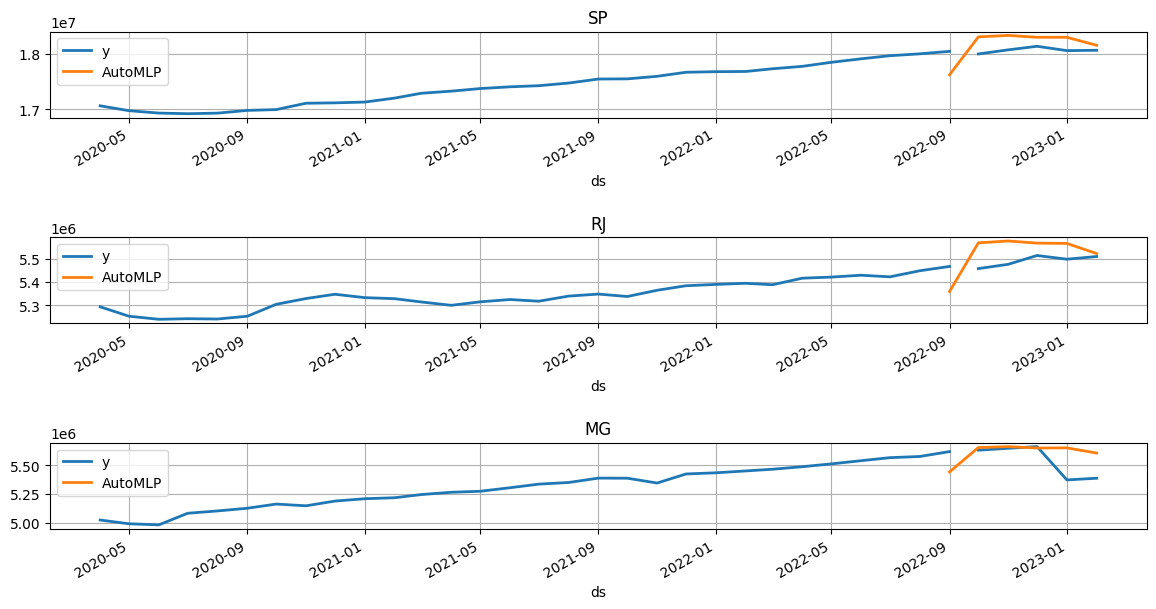

In [136]:
fig, ax = plt.subplots(3, 1, figsize = (1280/96, 720/96))
fig.tight_layout(pad=7.0)
for ax_i, unique_id in enumerate(['SP', 'RJ', 'MG']):
    plot_df = pd.concat([train.loc[train['unique_id'] == unique_id].tail(30),
                        p.loc[p['unique_id'] == unique_id]]).set_index('ds')
    plot_df[['y', 'AutoMLP']].plot(ax=ax[ax_i], linewidth=2, title=unique_id)
    ax[ax_i].grid()

In [137]:
best_config = models[0].results.get_best_result().metrics['config']

print(best_config)

{'h': 6, 'hidden_size': 256, 'num_layers': 3, 'learning_rate': 0.006272115749685133, 'scaler_type': None, 'max_steps': 500, 'batch_size': 32, 'windows_batch_size': 1024, 'loss': WMAPE(), 'random_seed': 2, 'input_size': 30, 'step_size': 6, 'valid_loss': WMAPE()}


In [138]:
results_df = models[0].results.get_dataframe().sort_values('loss')
results_df

loss  time_this_iter_s   done  training_iteration     trial_id  \
7  0.012677          0.763369  False                   5  a5dec_00007   
8  0.023007          0.773226  False                   5  a5dec_00008   
4  0.377876          0.908854  False                  10  a5dec_00004   
3  0.461213          0.808037  False                  10  a5dec_00003   
0  0.487234          0.926992  False                   5  a5dec_00000   
6  0.684115          0.946653  False                   5  a5dec_00006   
9  0.732727          0.931457  False                  10  a5dec_00009   
1  0.908017          1.157079  False                  10  a5dec_00001   
2  0.946642          1.272184  False                  10  a5dec_00002   
5  1.017259          1.254225  False                   5  a5dec_00005   

                  date   timestamp  time_total_s    pid        hostname  ...  \
7  2023-10-03_11-11-41  1696342301      3.936513  15288  MarceloPalumbo  ...   
8  2023-10-03_11-11-45  1696342305      3.955713  15288  MarceloPalumbo  ...   
4  2023-10-03_11-11-27  1696342287      8.984915  15288  MarceloPalumbo  ...   
3  2023-10-03_11-11-17  1696342277      8.146026  15288  MarceloPalumbo  ...   
0  2023-10-03_11-10-45  1696342245      9.073961  15288  MarceloPalumbo  ...   
6  2023-10-03_11-11-37  1696342297      4.618238  15288  MarceloPalumbo  ...   
9  2023-10-03_11-11-55  1696342315      9.940460  15288  MarceloPalumbo  ...   
1  2023-10-03_11-10-57  1696342257     11.762312  15288  MarceloPalumbo  ...   
2  2023-10-03_11-11-09  1696342269     12.081234  15288  MarceloPalumbo  ...   
5  2023-10-03_11-11-33  1696342293      6.239156  15288  MarceloPalumbo  ...   

  config/learning_rate  config/loss  config/max_steps  config/num_layers  \
7             0.006272      WMAPE()               500                  3   
8             0.026368      WMAPE()               500                  2   
4             0.000566      WMAPE()              1000                  5   
3             0.002911      WMAPE()              1000                  5   
0             0.022069      WMAPE()               500                  2   
6             0.005055      WMAPE()               500                  3   
9             0.001145      WMAPE()              1000                  2   
1             0.019614      WMAPE()              1000                  5   
2             0.020219      WMAPE()              1000                  5   
5             0.086576      WMAPE()               500                  5   

   config/random_seed  config/scaler_type  config/step_size  \
7                   2                None                 6   
8                  10                None                 6   
4                   4              robust                 1   
3                   6              robust                 1   
0                  18            standard                 1   
6                  15              robust                 1   
9                  12              robust                 6   
1                  18              robust                 1   
2                   8            standard                 1   
5                   9              robust                 6   

   config/valid_loss config/windows_batch_size  \
7            WMAPE()                      1024   
8            WMAPE()                       128   
4            WMAPE()                       512   
3            WMAPE()                       512   
0            WMAPE()                       128   
6            WMAPE()                      1024   
9            WMAPE()                      1024   
1            WMAPE()                      1024   
2            WMAPE()                      1024   
5            WMAPE()                       128   

                                              logdir  
7  C:\Users\marce\ray_results\train_tune_2023-10-...  
8  C:\Users\marce\ray_results\train_tune_2023-10-...  
4  C:\Users\marce\ray_results\train_tune_2023-10-...  
3  C:\Users\marce\ra

In [139]:
# o mÊs 2022-09-01 esta com valor null

print('XGBoost RMSE = ', sqrt(mean_squared_error(p.loc[p['ds'] != '2022-09-01', 'AutoMLP'], p.loc[p['ds'] != '2022-09-01', 'y'])))

XGBoost RMSE =  56443.98119650358


In [140]:
p_agrupado = round(p.loc[p['ds'] != '2022-09-01'].groupby(['ds'])['AutoMLP', 'y'].sum(), 2).reset_index()
p_agrupado

ds      AutoMLP           y
0 2022-10-01  50702355.69  50031204.0
1 2022-11-01  50774716.38  50195515.0
2 2022-12-01  50680332.38  50352475.0
3 2023-01-01  50679733.56  49929363.0
4 2023-02-01  50278313.48  49945411.0

In [141]:
print('XGBoost RMSE = ', sqrt(mean_squared_error(p_agrupado.loc[p_agrupado['ds'] != '2022-09-01', 'AutoMLP'], p_agrupado.loc[p_agrupado['ds'] != '2022-09-01', 'y'])))

XGBoost RMSE =  559873.0802082007


In [142]:
p_agrupado['Diferenca'] = abs(p_agrupado['AutoMLP'] - p_agrupado['y'])
p_agrupado

ds      AutoMLP           y  Diferenca
0 2022-10-01  50702355.69  50031204.0  671151.69
1 2022-11-01  50774716.38  50195515.0  579201.38
2 2022-12-01  50680332.38  50352475.0  327857.38
3 2023-01-01  50679733.56  49929363.0  750370.56
4 2023-02-01  50278313.48  49945411.0  332902.48

In [143]:
# plot
fig = plt.figure(figsize=(15, 9))
plt.plot(p_agrupado['y'].values, label = "Valores Observados", color="red")
plt.plot(p_agrupado['AutoMLP'].values, label = "Valores Previstos", color = "green")
#plt.plot(base['error'].values, label = "Valores de erro", color = "blue")
#plt.plot(base['Limite Inferior'].values, "r--", label="upper bond / lower bond", alpha=0.5, color='lightgreen')
#plt.plot(base['Limite Superior'].values, "r--", alpha=0.5, color='lightgreen')
#plt.fill_between(np.asarray(base.index), base['Limite Inferior'].values, base['Limite Superior'].values, color='whitesmoke')
plt.legend(loc = 'upper left') # 'best'
plt.title("XGBoost Prediction", size=22, color='darkgreen')
plt.grid(True)
plt.show()